# 4 Robust Statistics and Non Linear Methods

## 4.1 Data Import and Exploratory Data Analysis

In this assignment, you will employ different robust statistical techniques on the following financial data:

- 3 stocks (AAPL, IBM and JPM) and 1 index (DJI);
- Dates ranging from 16/03/2018 to 11/03/2019;
- Each file contains the following columns: *open, high, low, close, adj. close²*.


You will first conduct the following exploratory data analysis:

1. Import **AAPL.csv**, **IBM.csv**, **JPM.csv** and **DJI.csv** into separate `pandas.DataFrames`, and set the date as the index column. For each stock and for each column, generate the key descriptive statistics (e.g. mean, median, stddev, etc.) that summarize the distribution of the dataset. Lastly, using the *adj. close* column for each stock, compute the 1-day returns and add them to their corresponding dataframe as a new column.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read CSV files and set date as index
aapl = pd.read_csv('data/AAPL.csv', index_col='Date', parse_dates=True)
ibm = pd.read_csv('data/IBM.csv', index_col='Date', parse_dates=True)
jpm = pd.read_csv('data/JPM.csv', index_col='Date', parse_dates=True)
dji = pd.read_csv('data/DJI.csv', index_col='Date', parse_dates=True)

In [4]:
# Display the first few rows of each dataframe
print("AAPL Preview:")
aapl.head()

AAPL Preview:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  178.649994  179.119995  177.619995  178.020004  175.349915   
2018-03-19  177.320007  177.470001  173.660004  175.300003  172.670731   
2018-03-20  175.240005  176.800003  174.940002  175.240005  172.611618   
2018-03-21  175.039993  175.089996  171.259995  171.270004  168.701157   
2018-03-22  170.000000  172.679993  168.600006  168.850006  166.317459   

              Volume  
Date                  
2018-03-16  39404700  
2018-03-19  33446800  
2018-03-20  19649400  
2018-03-21  36338100  
2018-03-22  41490800

In [5]:
# IBM data preview
print("IBM Preview:")
ibm.head()

IBM Preview:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  160.059998  161.979996  159.639999  160.259995  153.051163   
2018-03-19  159.710007  159.889999  156.449997  157.350006  150.272064   
2018-03-20  157.520004  157.929993  155.289993  156.199997  149.173782   
2018-03-21  156.570007  158.199997  155.919998  156.690002  149.641754   
2018-03-22  155.000000  155.250000  152.000000  152.089996  145.248657   

             Volume  
Date                 
2018-03-16  9262700  
2018-03-19  5482000  
2018-03-20  4336700  
2018-03-21  3482200  
2018-03-22  4746300

In [6]:
# JPM data preview
print("JPM Preview:")
jpm.head()

JPM Preview:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  115.339996  116.599998  115.339996  115.440002  112.528511   
2018-03-19  115.099998  115.449997  113.300003  114.529999  111.641449   
2018-03-20  114.870003  115.449997  114.449997  114.639999  111.748680   
2018-03-21  114.809998  116.629997  114.209999  114.739998  111.846161   
2018-03-22  113.199997  113.599998  109.540001  109.949997  107.176964   

              Volume  
Date                  
2018-03-16  19888900  
2018-03-19  13214900  
2018-03-20   9921200  
2018-03-21  13633000  
2018-03-22  22550400

In [7]:
# DJI data preview
print("DJI Preview:")
dji.head()

DJI Preview:


Open          High           Low         Close  \
Date                                                                 
2018-03-16  24877.339844  25031.000000  24857.089844  24946.509766   
2018-03-19  24893.689453  24893.689453  24453.140625  24610.910156   
2018-03-20  24650.640625  24803.609375  24650.640625  24727.269531   
2018-03-21  24723.490234  24977.650391  24655.400391  24682.310547   
2018-03-22  24526.009766  24526.009766  23938.740234  23957.890625   

               Adj Close     Volume  
Date                                 
2018-03-16  24946.509766  654240000  
2018-03-19  24610.910156  377990000  
2018-03-20  24727.269531  342510000  
2018-03-21  24682.310547  343230000  
2018-03-22  23957.890625  439280000

In [8]:
# Calculate descriptive statistics for each stock dataframe
print("AAPL Descriptive Statistics:")
aapl_stats = aapl.describe()
aapl_stats

AAPL Descriptive Statistics:


Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   187.686694  189.561753  185.823705  187.711953  186.174273   
std     22.145621   22.281577   22.008797   22.160721   21.904664   
min    143.979996  145.720001  142.000000  142.190002  141.582779   
25%    171.319999  173.035004  169.724998  171.004998  170.214981   
50%    186.289993  187.399994  184.940002  186.119995  184.351776   
75%    207.320000  209.375000  205.784996  207.760002  205.900421   
max    230.779999  233.470001  229.779999  232.070007  230.275482   

             Volume  
count  2.510000e+02  
mean   3.270475e+07  
std    1.417972e+07  
min    1.251390e+07  
25%    2.288735e+07  
50%    2.918400e+07  
75%    3.919905e+07  
max    9.624670e+07

In [9]:
print("IBM Descriptive Statistics:")
ibm_stats = ibm.describe()
ibm_stats

IBM Descriptive Statistics:


Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   138.454382  139.492072  137.329243  138.363108  134.902751   
std     12.114308   11.913079   12.204633   12.028123   10.671648   
min    108.000000  111.000000  105.940002  107.570000  106.331108   
25%    131.269996  132.555001  129.224998  130.880005  127.745647   
50%    142.809998  143.990005  142.059998  142.710007  138.566391   
75%    146.649994  147.275002  145.565002  146.385002  141.849586   
max    160.059998  162.000000  159.639999  160.910004  153.671936   

             Volume  
count  2.510000e+02  
mean   5.198937e+06  
std    3.328956e+06  
min    1.963200e+06  
25%    3.436050e+06  
50%    4.237900e+06  
75%    5.389000e+06  
max    2.206370e+07

In [10]:
print("JPM Descriptive Statistics:")
jpm_stats = jpm.describe()
jpm_stats

JPM Descriptive Statistics:


Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   108.707689  109.652072  107.682988  108.606574  107.262590   
std      5.359081    5.202870    5.432537    5.300480    4.833316   
min     92.690002   94.220001   91.110001   92.139999   91.397758   
25%    104.554997  105.419998  103.699997  104.509998  104.140000   
50%    109.180000  110.529999  107.790001  109.019997  107.219269   
75%    113.365002  114.265000  112.544998  113.344997  111.362442   
max    119.129997  119.239998  118.080002  118.629997  116.856049   

             Volume  
count  2.510000e+02  
mean   1.470069e+07  
std    5.349771e+06  
min    6.488400e+06  
25%    1.081290e+07  
50%    1.363300e+07  
75%    1.704650e+07  
max    4.131390e+07

In [11]:
print("DJI Descriptive Statistics:")
dji_stats = dji.describe()
dji_stats

DJI Descriptive Statistics:


Open          High           Low         Close     Adj Close  \
count    251.000000    251.000000    251.000000    251.000000    251.000000   
mean   25001.257268  25142.041965  24846.002226  24999.153581  24999.153581   
std      858.834708    815.203959    903.302186    859.132105    859.132105   
min    21857.730469  22339.869141  21712.529297  21792.199219  21792.199219   
25%    24485.610352  24614.274414  24275.590821  24433.089844  24433.089844   
50%    25025.580078  25124.099609  24883.039063  25044.289063  25044.289063   
75%    25595.044922  25692.090821  25480.009765  25591.245117  25591.245117   
max    26833.470703  26951.810547  26789.080078  26828.390625  26828.390625   

             Volume  
count  2.510000e+02  
mean   3.328894e+08  
std    9.407804e+07  
min    1.559400e+08  
25%    2.701000e+08  
50%    3.137900e+08  
75%    3.790300e+08  
max    9.005100e+08

In [12]:
# Calculate 1-day returns and add as new column
# Formula: (current day closing price / previous day closing price) - 1

# AAPL returns
aapl['Daily_Return'] = aapl['Adj Close'].pct_change()
print("AAPL with Daily Returns:")
aapl.head()

AAPL with Daily Returns:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  178.649994  179.119995  177.619995  178.020004  175.349915   
2018-03-19  177.320007  177.470001  173.660004  175.300003  172.670731   
2018-03-20  175.240005  176.800003  174.940002  175.240005  172.611618   
2018-03-21  175.039993  175.089996  171.259995  171.270004  168.701157   
2018-03-22  170.000000  172.679993  168.600006  168.850006  166.317459   

              Volume  Daily_Return  
Date                                
2018-03-16  39404700           NaN  
2018-03-19  33446800     -0.015279  
2018-03-20  19649400     -0.000342  
2018-03-21  36338100     -0.022655  
2018-03-22  41490800     -0.014130

In [13]:
# IBM returns
ibm['Daily_Return'] = ibm['Adj Close'].pct_change()
print("IBM with Daily Returns:")
ibm.head()

IBM with Daily Returns:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  160.059998  161.979996  159.639999  160.259995  153.051163   
2018-03-19  159.710007  159.889999  156.449997  157.350006  150.272064   
2018-03-20  157.520004  157.929993  155.289993  156.199997  149.173782   
2018-03-21  156.570007  158.199997  155.919998  156.690002  149.641754   
2018-03-22  155.000000  155.250000  152.000000  152.089996  145.248657   

             Volume  Daily_Return  
Date                               
2018-03-16  9262700           NaN  
2018-03-19  5482000     -0.018158  
2018-03-20  4336700     -0.007309  
2018-03-21  3482200      0.003137  
2018-03-22  4746300     -0.029357

In [14]:
# JPM returns
jpm['Daily_Return'] = jpm['Adj Close'].pct_change()
print("JPM with Daily Returns:")
jpm.head()

JPM with Daily Returns:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-03-16  115.339996  116.599998  115.339996  115.440002  112.528511   
2018-03-19  115.099998  115.449997  113.300003  114.529999  111.641449   
2018-03-20  114.870003  115.449997  114.449997  114.639999  111.748680   
2018-03-21  114.809998  116.629997  114.209999  114.739998  111.846161   
2018-03-22  113.199997  113.599998  109.540001  109.949997  107.176964   

              Volume  Daily_Return  
Date                                
2018-03-16  19888900           NaN  
2018-03-19  13214900     -0.007883  
2018-03-20   9921200      0.000960  
2018-03-21  13633000      0.000872  
2018-03-22  22550400     -0.041747

In [15]:
# DJI returns
dji['Daily_Return'] = dji['Adj Close'].pct_change()
print("DJI with Daily Returns:")
dji.head()

DJI with Daily Returns:


Open          High           Low         Close  \
Date                                                                 
2018-03-16  24877.339844  25031.000000  24857.089844  24946.509766   
2018-03-19  24893.689453  24893.689453  24453.140625  24610.910156   
2018-03-20  24650.640625  24803.609375  24650.640625  24727.269531   
2018-03-21  24723.490234  24977.650391  24655.400391  24682.310547   
2018-03-22  24526.009766  24526.009766  23938.740234  23957.890625   

               Adj Close     Volume  Daily_Return  
Date                                               
2018-03-16  24946.509766  654240000           NaN  
2018-03-19  24610.910156  377990000     -0.013453  
2018-03-20  24727.269531  342510000      0.004728  
2018-03-21  24682.310547  343230000     -0.001818  
2018-03-22  23957.890625  439280000     -0.029350

In [16]:
# Descriptive statistics for daily returns
returns_stats = pd.DataFrame({
    'AAPL': aapl['Daily_Return'].describe(),
    'IBM': ibm['Daily_Return'].describe(),
    'JPM': jpm['Daily_Return'].describe(),
    'DJI': dji['Daily_Return'].describe()
})

print("Comparative Statistics of Daily Returns:")
returns_stats

Comparative Statistics of Daily Returns:


AAPL         IBM         JPM         DJI
count  250.000000  250.000000  250.000000  250.000000
mean     0.000426   -0.000252   -0.000133    0.000197
std      0.019323    0.015562    0.013088    0.010476
min     -0.099607   -0.076282   -0.044636   -0.031472
25%     -0.008675   -0.006501   -0.007409   -0.004096
50%      0.001611    0.000409   -0.000603    0.000375
75%      0.009429    0.006723    0.007561    0.005794
max      0.070422    0.084639    0.041459    0.049846

2. Plot the histogram and probability density function of the *adj. close* and 1-day returns. Comment on the difference, if any, between the pdf of the *adj. close* and the returns.

In [17]:
# Import additional libraries for density estimation
from scipy import stats
import seaborn as sns

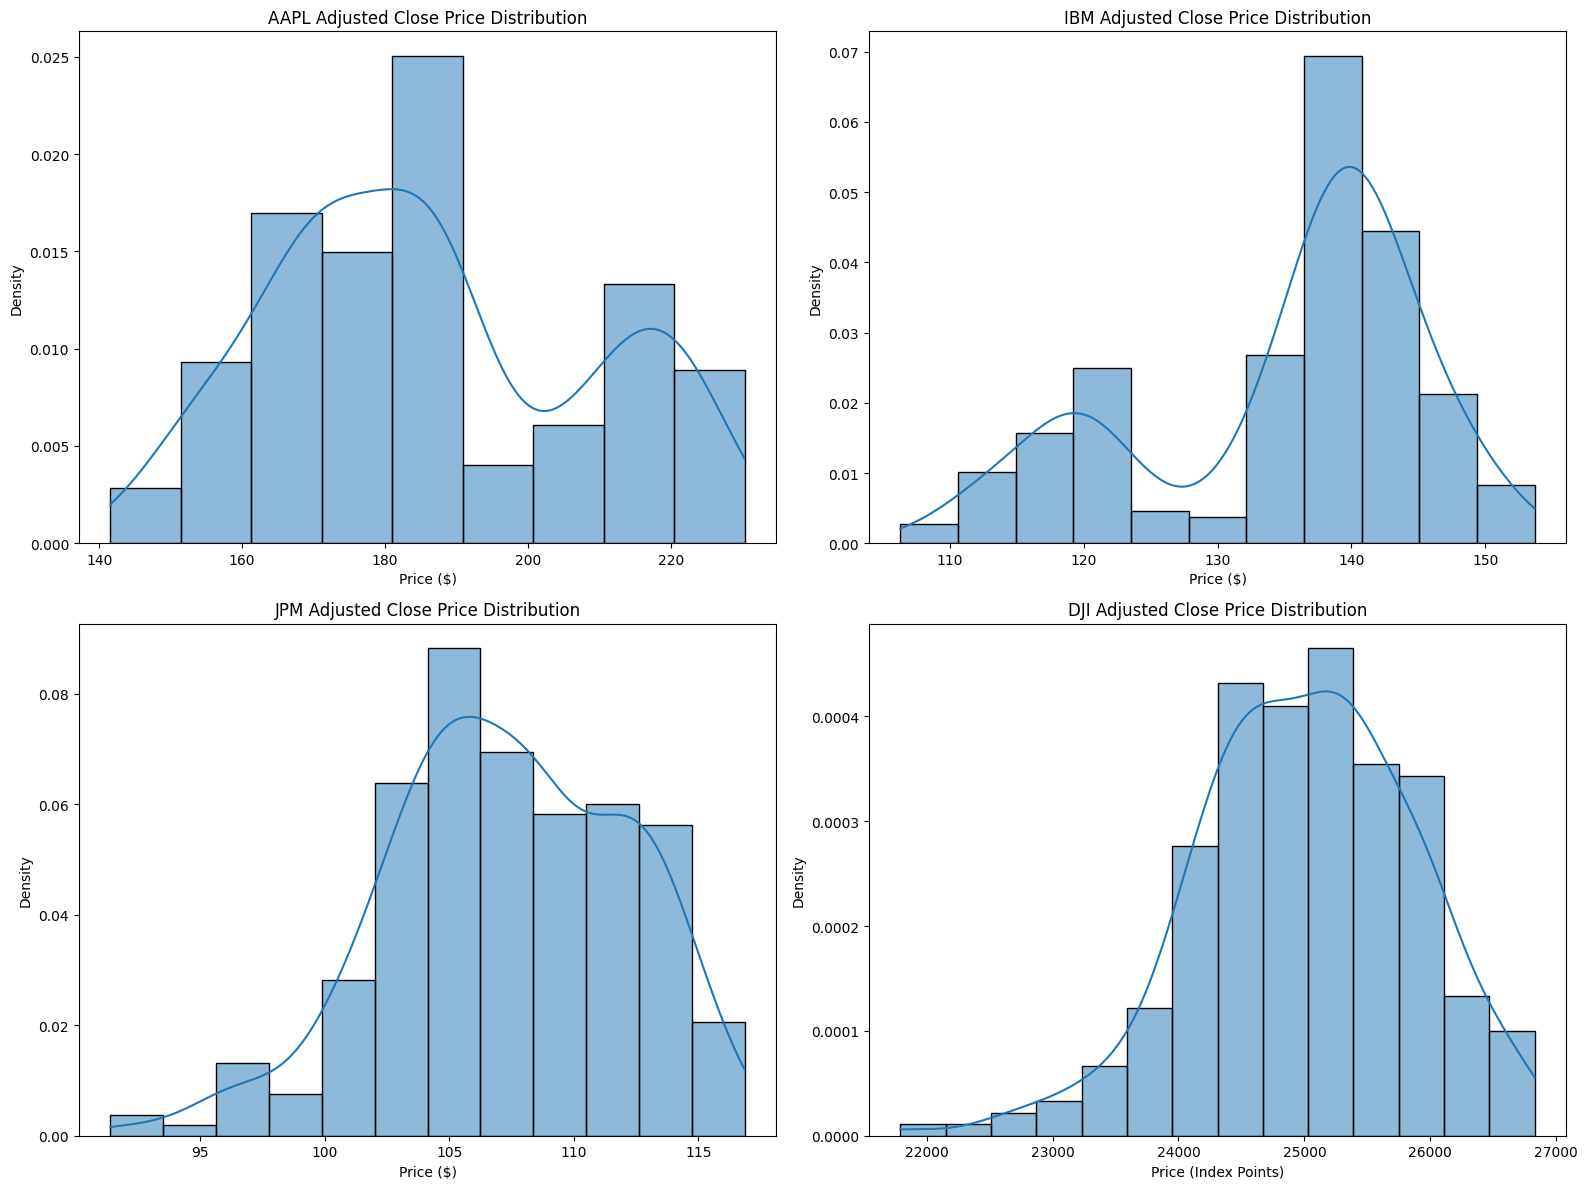

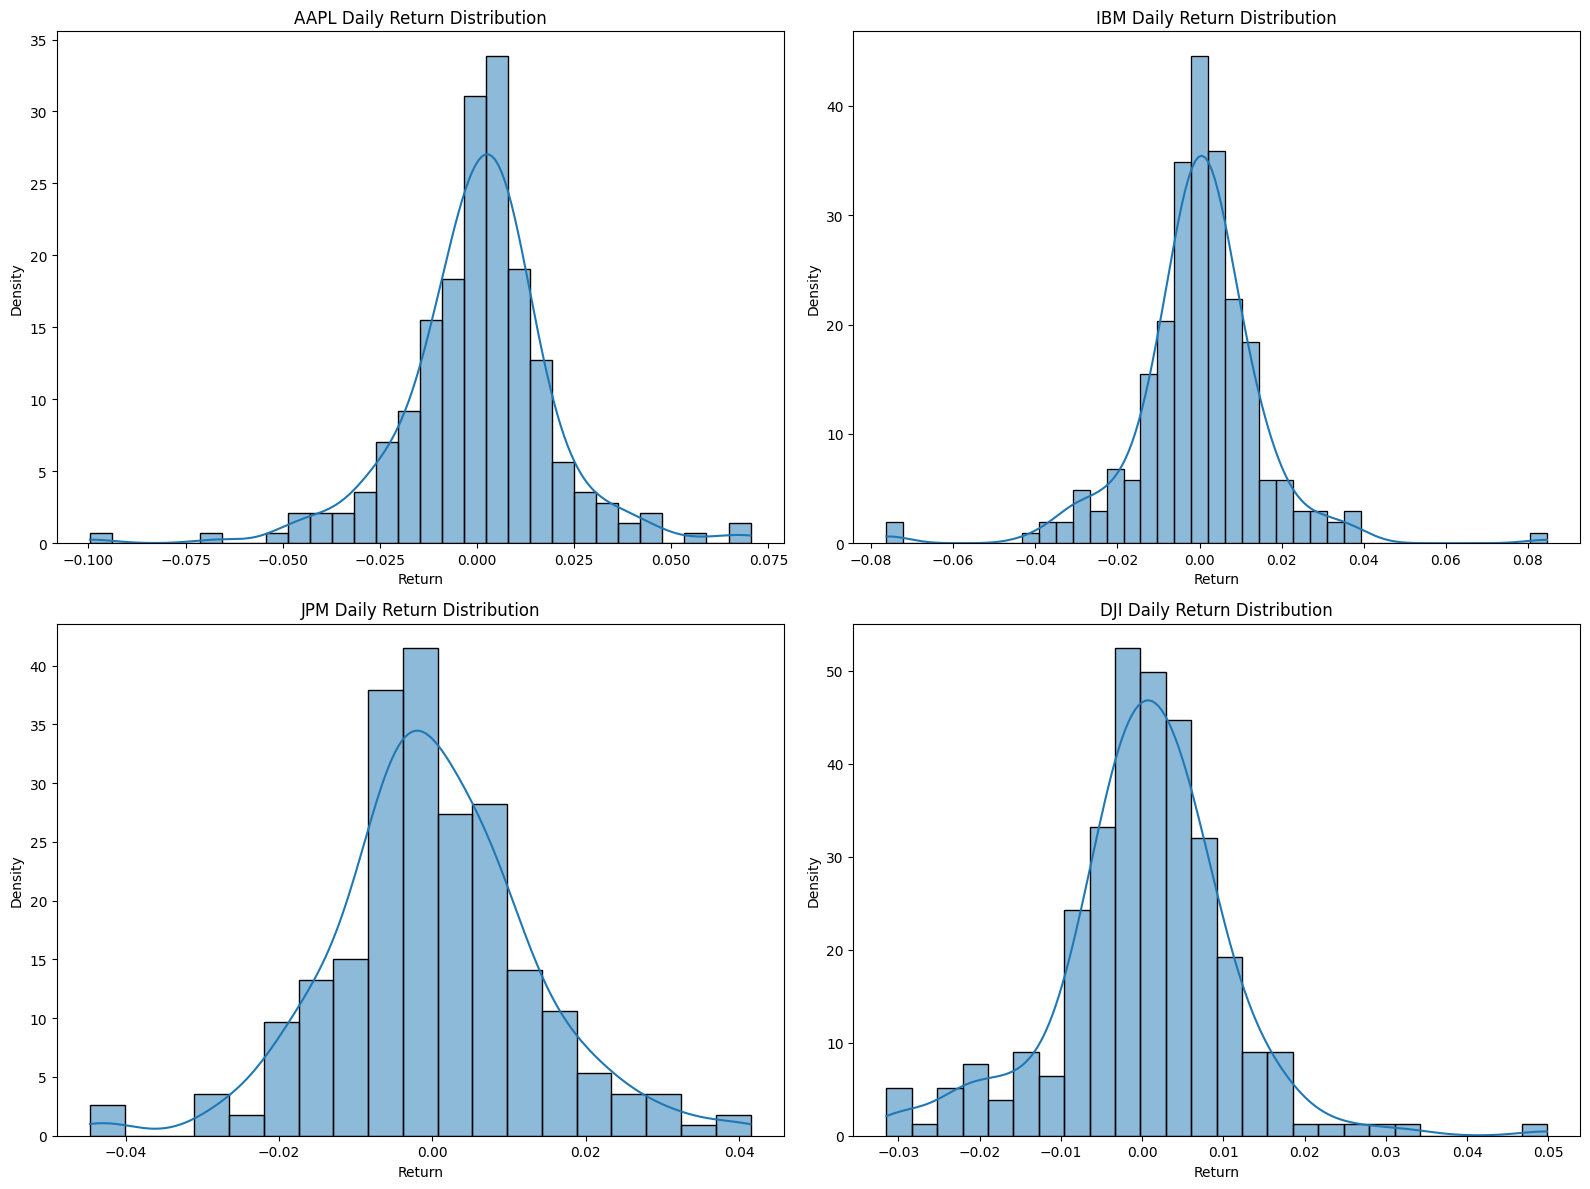

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [18]:
# Create a figure for adjusted close price distributions
plt.figure(figsize=(16, 12))

# Plot histograms and PDFs for adjusted close prices
plt.subplot(2, 2, 1)
sns.histplot(aapl['Adj Close'], kde=True, stat='density')
plt.title('AAPL Adjusted Close Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(2, 2, 2)
sns.histplot(ibm['Adj Close'], kde=True, stat='density')
plt.title('IBM Adjusted Close Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(2, 2, 3)
sns.histplot(jpm['Adj Close'], kde=True, stat='density')
plt.title('JPM Adjusted Close Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(2, 2, 4)
sns.histplot(dji['Adj Close'], kde=True, stat='density')
plt.title('DJI Adjusted Close Price Distribution')
plt.xlabel('Price (Index Points)')

plt.tight_layout()
plt.savefig('adj_close_distributions.png')
plt.show()

# Create a figure for daily return distributions
plt.figure(figsize=(16, 12))

# Plot histograms and PDFs for daily returns
plt.subplot(2, 2, 1)
sns.histplot(aapl['Daily_Return'].dropna(), kde=True, stat='density')
plt.title('AAPL Daily Return Distribution')
plt.xlabel('Return')

plt.subplot(2, 2, 2)
sns.histplot(ibm['Daily_Return'].dropna(), kde=True, stat='density')
plt.title('IBM Daily Return Distribution')
plt.xlabel('Return')

plt.subplot(2, 2, 3)
sns.histplot(jpm['Daily_Return'].dropna(), kde=True, stat='density')
plt.title('JPM Daily Return Distribution')
plt.xlabel('Return')

plt.subplot(2, 2, 4)
sns.histplot(dji['Daily_Return'].dropna(), kde=True, stat='density')
plt.title('DJI Daily Return Distribution')
plt.xlabel('Return')

plt.tight_layout()
plt.savefig('daily_return_distributions.png')
plt.show()

# Compare normal distribution fit for both variables
plt.figure(figsize=(16, 10))

### 1. Distribution Shape

#### Adjusted Close Price Distribution (First Chart):
- Most stocks (such as AAPL, IBM, and JPM) exhibit **right-skewed (Right-Skewed) or bimodal (Bimodal) distributions**, indicating long-term trend changes or periodic fluctuations in stock prices.
- For example, AAPL and IBM may have experienced price surges or corrections, leading to multiple peaks in their PDF.
- DJI (Dow Jones Index) shows a relatively normal distribution but with slight right skewness, reflecting its long-term upward trend.

#### Daily Return Distribution (Second Chart):
- The 1-day return distribution is **closer to a normal distribution (Normal Distribution)**, with most returns concentrated around 0, indicating that daily market fluctuations are generally not extreme.
- The return PDFs for all assets exhibit **a unimodal and symmetric shape**, suggesting that most of the time, returns fluctuate around the mean (typically close to 0), though extreme returns (fat tails) occasionally occur.


### 2. Volatility

- **Lower volatility in adjusted close prices**: Stock prices tend to change gradually over a long period, resulting in a relatively wide distribution range, but with relatively stable short-term price movements.
- **Higher volatility in daily returns**: Although the mean return is close to 0, the volatility (standard deviation) can be high. Particularly for AAPL and IBM, the wider range of their return PDF suggests that short-term price movements can be more volatile.

### 3. Economic Interpretation

- **Adjusted close prices reflect long-term trends**, such as corporate growth, market fluctuations, and policy influences, leading to multiple peaks or right-skewed distributions.
- **Returns reflect short-term market sentiment**, with distributions that are more normal-like but with fatter tails, indicating that extreme market events (such as price surges or crashes) occur occasionally.


3. For each stock, plot the *adj. close*, the associated **rolling mean** (using a 5-day window), and the ±1.5× **standard deviations** relative to the rolling mean. In a separate figure, repeat the steps above using the **rolling median** (using a 5-day window) and ±1.5× **median absolute deviation** relative to the rolling median. Comment on the difference, if any, between the two figures.


In [19]:

import matplotlib.dates as mdates


# Define function to plot combined chart - mean/standard deviation vs median/MAD method comparison
def plot_combined_rolling_stats(stock_df, stock_name, window=5, figsize=(14, 10)):
    """
    Create combined chart for each stock, displaying mean and median methods vertically
    """
    rolling_mean = stock_df['Adj Close'].rolling(window=window).mean()
    rolling_std = stock_df['Adj Close'].rolling(window=window).std()
    
    # Calculate rolling median and median absolute deviation (MAD)
    rolling_median = stock_df['Adj Close'].rolling(window=window).median()
    
    def rolling_mad(x):
        median = np.median(x)
        return np.median(np.abs(x - median))
    
    rolling_mad = stock_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Create subplots with vertical arrangement
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True)
    
    # Plot top chart - rolling mean and standard deviation bands
    ax1.plot(stock_df.index, stock_df['Adj Close'], label='Adj Close', color='blue')
    ax1.plot(stock_df.index, rolling_mean, label=f'{window}-day Rolling Mean', color='red')
    ax1.plot(stock_df.index, rolling_mean + 1.5 * rolling_std, 
             label='Upper Band (1.5 x STD)', linestyle='--', color='green')
    ax1.plot(stock_df.index, rolling_mean - 1.5 * rolling_std, 
             label='Lower Band (1.5 x STD)', linestyle='--', color='green')
    ax1.fill_between(stock_df.index, 
                    rolling_mean + 1.5 * rolling_std, 
                    rolling_mean - 1.5 * rolling_std,
                    alpha=0.2, color='green')
    ax1.set_title(f'{stock_name} - Rolling Mean and STD Bands')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    
    # Plot bottom chart - rolling median and MAD bands
    ax2.plot(stock_df.index, stock_df['Adj Close'], label='Adj Close', color='blue')
    ax2.plot(stock_df.index, rolling_median, label=f'{window}-day Rolling Median', color='red')
    ax2.plot(stock_df.index, rolling_median + 1.5 * rolling_mad, 
             label='Upper Band (1.5 x MAD)', linestyle='--', color='purple')
    ax2.plot(stock_df.index, rolling_median - 1.5 * rolling_mad, 
             label='Lower Band (1.5 x MAD)', linestyle='--', color='purple')
    ax2.fill_between(stock_df.index, 
                    rolling_median + 1.5 * rolling_mad, 
                    rolling_median - 1.5 * rolling_mad,
                    alpha=0.2, color='purple')
    ax2.set_title(f'{stock_name} - Rolling Median and MAD Bands')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Price')
    ax2.legend(loc='upper left')
    
    # Format x-axis dates
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(ax2.get_xticklabels(), rotation=45)
    
    # Add total title
    plt.suptitle(f'{stock_name} - Comparison of Rolling Statistics Methods', fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.92)
    
    return fig

def rolling_mad(x):
    median = np.median(x)
    return np.median(np.abs(x - median))

def print_comparison_stats(stock_df, stock_name, window=5):
    """
        Calculate and print statistical comparison between two methods
    """
    # Calculate rolling statistics
    rolling_mean = stock_df['Adj Close'].rolling(window=window).mean()
    rolling_std = stock_df['Adj Close'].rolling(window=window).std()
    rolling_median = stock_df['Adj Close'].rolling(window=window).median()
    
    # Use global function to calculate MAD, avoiding naming conflicts
    rolling_mad_values = stock_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Calculate average bandwidth
    mean_band_width = (rolling_mean + 1.5 * rolling_std - (rolling_mean - 1.5 * rolling_std)).mean()
    median_band_width = (rolling_median + 1.5 * rolling_mad_values - (rolling_median - 1.5 * rolling_mad_values)).mean()
    
    # Calculate number of observations outside bands
    outside_mean_bands = ((stock_df['Adj Close'] > rolling_mean + 1.5 * rolling_std) | 
                         (stock_df['Adj Close'] < rolling_mean - 1.5 * rolling_std)).sum()
    outside_median_bands = ((stock_df['Adj Close'] > rolling_median + 1.5 * rolling_mad_values) | 
                           (stock_df['Adj Close'] < rolling_median - 1.5 * rolling_mad_values)).sum()
    
    print(f"\n{stock_name} Comparison:")
    print("-" * 40)
    print(f"Rolling Mean Bandwidth (Average): {mean_band_width:.2f}")
    print(f"Rolling Median Bandwidth (Average): {median_band_width:.2f}")
    print(f"Bandwidth Ratio (Mean/Median): {mean_band_width/median_band_width:.2f}")
    print(f"Observations outside Mean Bands: {outside_mean_bands}")
    print(f"Observations outside Median Bands: {outside_median_bands}")
    print(f"Difference: {outside_median_bands - outside_mean_bands}")



AAPL Comparison:
----------------------------------------
Rolling Mean Bandwidth (Average): 8.59
Rolling Median Bandwidth (Average): 5.25
Bandwidth Ratio (Mean/Median): 1.64
Observations outside Mean Bands: 30
Observations outside Median Bands: 103
Difference: 73


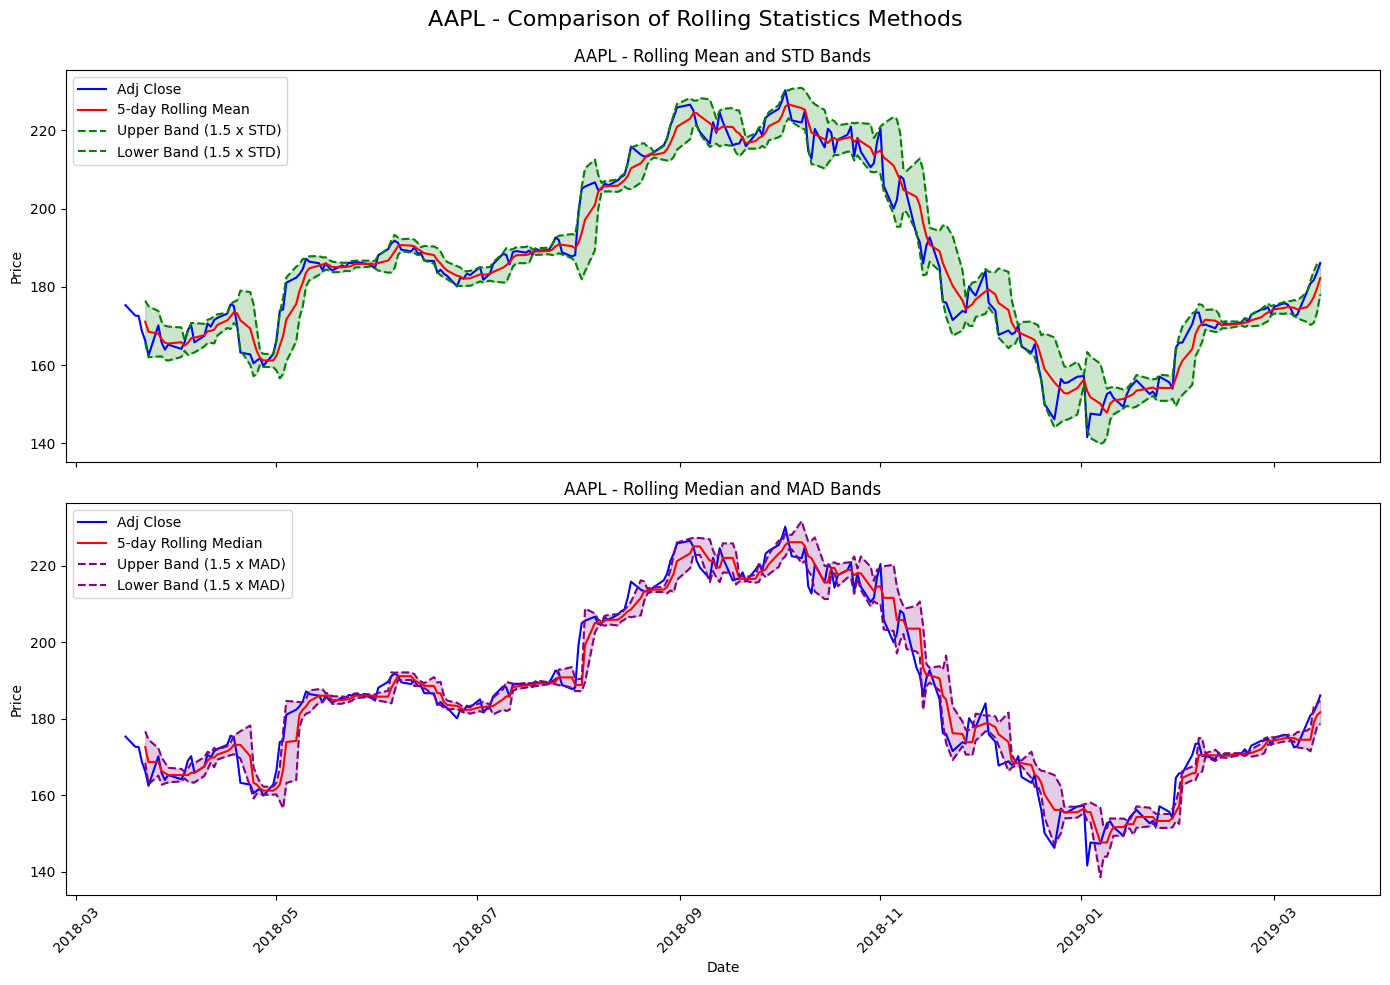

In [20]:

# Create vertical combined charts for all stocks
aapl_combined_fig = plot_combined_rolling_stats(aapl, 'AAPL')
print_comparison_stats(aapl, 'AAPL')
plt.show()

## **Analysis of Differences Between Rolling Mean and Rolling Median for AAPL**

### **1. Bandwidth Comparison**
- **Rolling Mean Bandwidth = 8.59**
- **Rolling Median Bandwidth = 5.25**
- **Bandwidth Ratio (Mean/Median) = 1.64**

Bandwidth reflects the range of price fluctuations. Since the mean bandwidth is larger than the median bandwidth, this indicates that **the standard deviation (STD)-based volatility measure is more sensitive to extreme price changes compared to the median absolute deviation (MAD)-based method**.

- In the **Rolling Mean + STD channel (upper figure)**, the fluctuation range is wider.
- In contrast, the **Rolling Median + MAD channel (lower figure)** has a narrower bandwidth, indicating that MAD is more effective in suppressing extreme fluctuations.

### **2. Observations Outside the Bands**
- **Number of points outside the Mean-based bands: 30**
- **Number of points outside the Median-based bands: 103**
- **Difference: 73**

**The median-based method (Median + MAD) detects 73 more extreme points than the mean-based method (Mean + STD)**, meaning that:
- **The Mean + STD method is more adaptable to extreme market fluctuations**, as its bandwidth is wider, allowing only 30 points to fall outside.
- **The Median + MAD method is more effective in identifying outliers**, with a narrower bandwidth resulting in 103 points being detected as extreme.

This suggests that **MAD is more sensitive to detecting sharp price changes, whereas the standard deviation method tends to smooth market fluctuations**.

---

**Mean + STD is suitable for long-term trend analysis**:
  - Since the mean is influenced by extreme values, it is useful for smoothing market trends and observing long-term changes.
  - In the figure, the upper green dashed lines show a broader fluctuation range, indicating that the mean method accommodates market fluctuations within a larger range, avoiding excessive sensitivity.

**Median + MAD is suitable for detecting short-term anomalies**:
  - The median is not affected by outliers, making it more effective in identifying short-term price anomalies, such as market shocks or temporary spikes.
  - In the figure, the lower pink dashed lines have a narrower bandwidth, leading to more data points falling outside the


IBM Comparison:
----------------------------------------
Rolling Mean Bandwidth (Average): 4.87
Rolling Median Bandwidth (Average): 2.77
Bandwidth Ratio (Mean/Median): 1.76
Observations outside Mean Bands: 31
Observations outside Median Bands: 94
Difference: 63


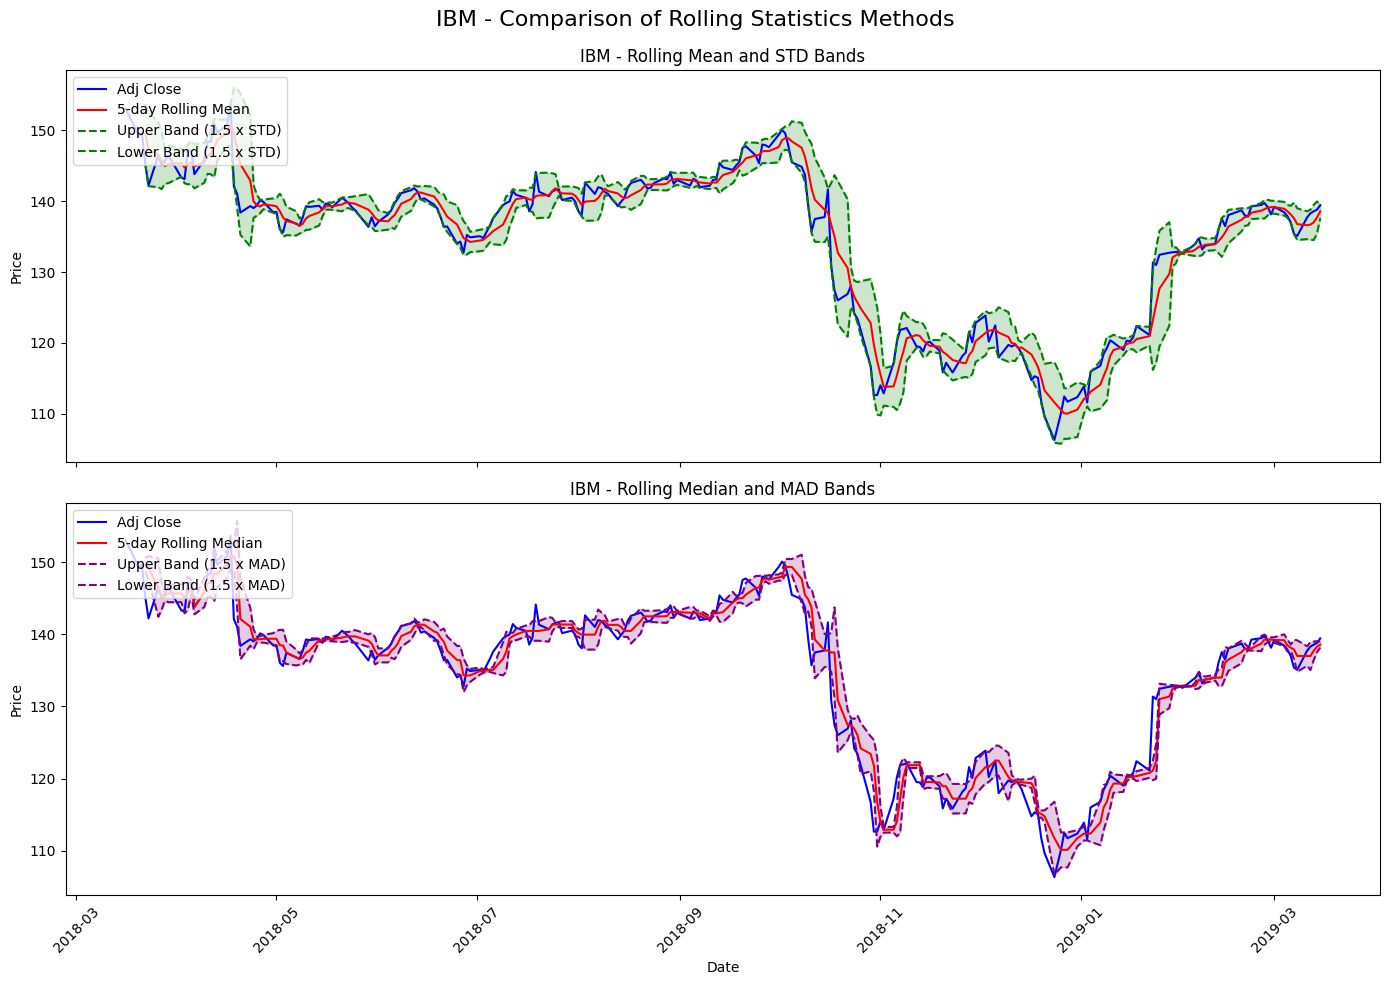

In [21]:

ibm_combined_fig = plot_combined_rolling_stats(ibm, 'IBM')
print_comparison_stats(ibm, 'IBM')
plt.show()

The **Rolling Mean + STD method** has a 1.76x wider bandwidth (4.87 vs. 2.77), allowing it to accommodate larger market fluctuations without easily exceeding the bandwidth range, whereas the **Rolling Median + MAD method** has a narrower bandwidth, making it more sensitive to short-term price changes. 

In terms of anomaly detection, the **STD method** identified only 31 outliers due to its broader range, suggesting that IBM's price movements were relatively stable over the long term and that this method is better suited for trend tracking rather than short-term anomaly detection. In contrast, the **MAD method** detected 94 anomalies, reflecting its higher sensitivity to short-term price spikes and its effectiveness in identifying sudden market fluctuations. However, this heightened sensitivity may also lead to false positives, misclassifying normal market fluctuations as anomalies. 

From a trend perspective, IBM's stock price experienced a significant decline between October 2018 and January 2019 (from around $150 to $110). During this downtrend, both Rolling Mean and Rolling Median curves remained largely in sync, but the **Rolling Median method exhibited a narrower fluctuation range**, making it more responsive to price changes. After January 2019, IBM’s stock price gradually recovered, and during this recovery phase, the differences between the mean and median methods were minimal, indicating a stabilization in market volatility.


JPM Comparison:
----------------------------------------
Rolling Mean Bandwidth (Average): 3.62
Rolling Median Bandwidth (Average): 2.17
Bandwidth Ratio (Mean/Median): 1.67
Observations outside Mean Bands: 33
Observations outside Median Bands: 105
Difference: 72


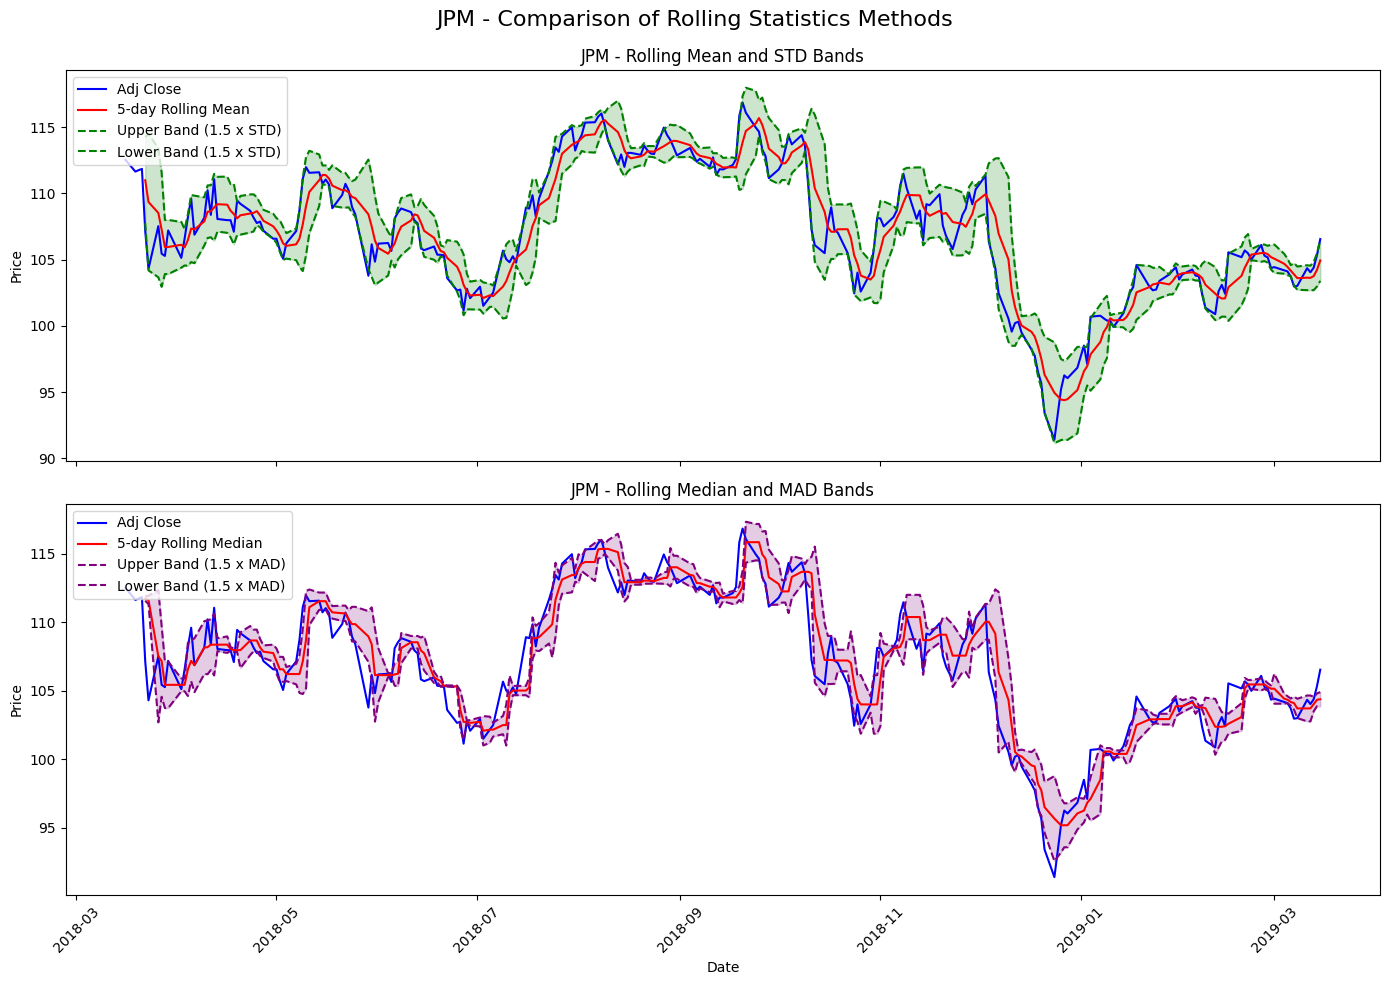

In [22]:

jpm_combined_fig = plot_combined_rolling_stats(jpm, 'JPM')
print_comparison_stats(jpm, 'JPM')
plt.show()

JPM's rolling statistics analysis shows that the **Rolling Mean bandwidth (3.62) is 1.67 times larger than the Rolling Median bandwidth (2.17)**, indicating that the mean-based method has a wider fluctuation band, allowing it to better smooth short-term volatility, while the median-based method is more sensitive to price movements. In anomaly detection, **Rolling Mean detected only 33 anomalies, whereas Rolling Median detected 105, a difference of 72**, suggesting that the MAD method is more effective in identifying short-term market fluctuations but may also lead to false positives. In the chart, the Rolling Mean method exhibits a wider fluctuation range, accommodating larger market movements, while the Rolling Median method closely follows price trends and reacts more quickly to short-term changes. Notably, during the price decline from **November 2018 to January 2019**, the MAD method was significantly more sensitive than the STD method, highlighting that **Rolling Mean is better suited for trend tracking, while Rolling Median is more effective for short-term anomaly detection.**


DJI Comparison:
----------------------------------------
Rolling Mean Bandwidth (Average): 647.76
Rolling Median Bandwidth (Average): 407.60
Bandwidth Ratio (Mean/Median): 1.59
Observations outside Mean Bands: 30
Observations outside Median Bands: 97
Difference: 67


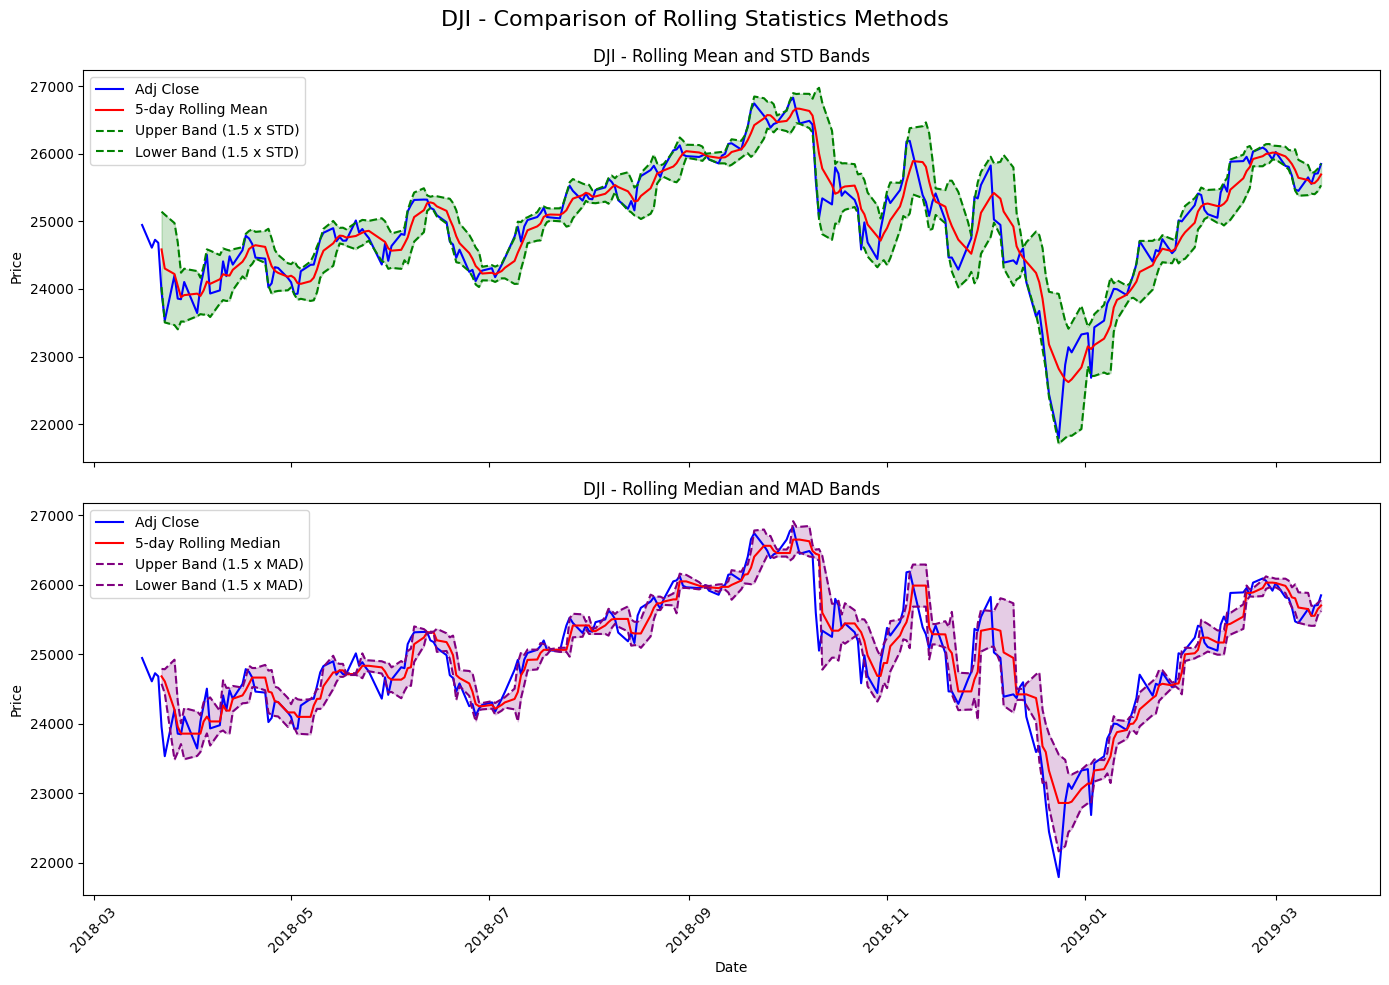

In [23]:

dji_combined_fig = plot_combined_rolling_stats(dji, 'DJI')
print_comparison_stats(dji, 'DJI')
plt.show()

The rolling statistics analysis of the DJI index indicates that **the Rolling Mean bandwidth (647.76) is 1.59 times larger than the Rolling Median bandwidth (407.60)**. This suggests that the mean-based method provides a wider fluctuation range, making it more effective in smoothing market volatility, whereas the median-based method is more sensitive to short-term price changes.
In terms of anomaly detection, **the Rolling Mean method detected only 30 outliers, while the Rolling Median method identified 97, a difference of 67**, demonstrating that the MAD method is more responsive to short-term fluctuations in the DJI index but may also result in a higher number of false positives. 
From the visual analysis, the Rolling Mean method shows a broader fluctuation range, accommodating larger market movements, whereas the Rolling Median method has a narrower bandwidth, closely following price trends. This is particularly evident during the significant decline from December 2018 to January 2019, where the MAD method responded more quickly to market changes compared to the STD method. 
This further confirms that **the Rolling Mean method is more suitable for long-term trend analysis, while the Rolling Median method is better at capturing short-term market anomalies.**

In [24]:

# Save vertical combined charts
aapl_combined_fig.savefig('AAPL_combined_vertical.png', dpi=300, bbox_inches='tight')
ibm_combined_fig.savefig('IBM_combined_vertical.png', dpi=300, bbox_inches='tight')
jpm_combined_fig.savefig('JPM_combined_vertical.png', dpi=300, bbox_inches='tight')
dji_combined_fig.savefig('DJI_combined_vertical.png', dpi=300, bbox_inches='tight')

4. Introduce outlier points for the *adj. close* in the four dates {2018-05-14, 2018-09-14, 2018-12-14, 2019-01-14} with a value equal to 1.2 × the maximum value of the column. Comment on the impact of the outlier points in Part 3.

Introducing outliers to AAPL:
Outlier introduced at 2018-05-14: 276.33
Outlier introduced at 2018-09-14: 276.33
Outlier introduced at 2018-12-14: 276.33
Outlier introduced at 2019-01-14: 276.33

Introducing outliers to IBM:
Outlier introduced at 2018-05-14: 184.41
Outlier introduced at 2018-09-14: 184.41
Outlier introduced at 2018-12-14: 184.41
Outlier introduced at 2019-01-14: 184.41

Introducing outliers to JPM:
Outlier introduced at 2018-05-14: 140.23
Outlier introduced at 2018-09-14: 140.23
Outlier introduced at 2018-12-14: 140.23
Outlier introduced at 2019-01-14: 140.23

Introducing outliers to DJI:
Outlier introduced at 2018-05-14: 32194.07
Outlier introduced at 2018-09-14: 32194.07
Outlier introduced at 2018-12-14: 32194.07
Outlier introduced at 2019-01-14: 32194.07

===== QUANTIFYING THE IMPACT OF OUTLIERS =====

AAPL - Impact of Outliers:
--------------------------------------------------
Mean Method Band Width (Original): 8.59
Mean Method Band Width (With Outliers): 18.40
Mea

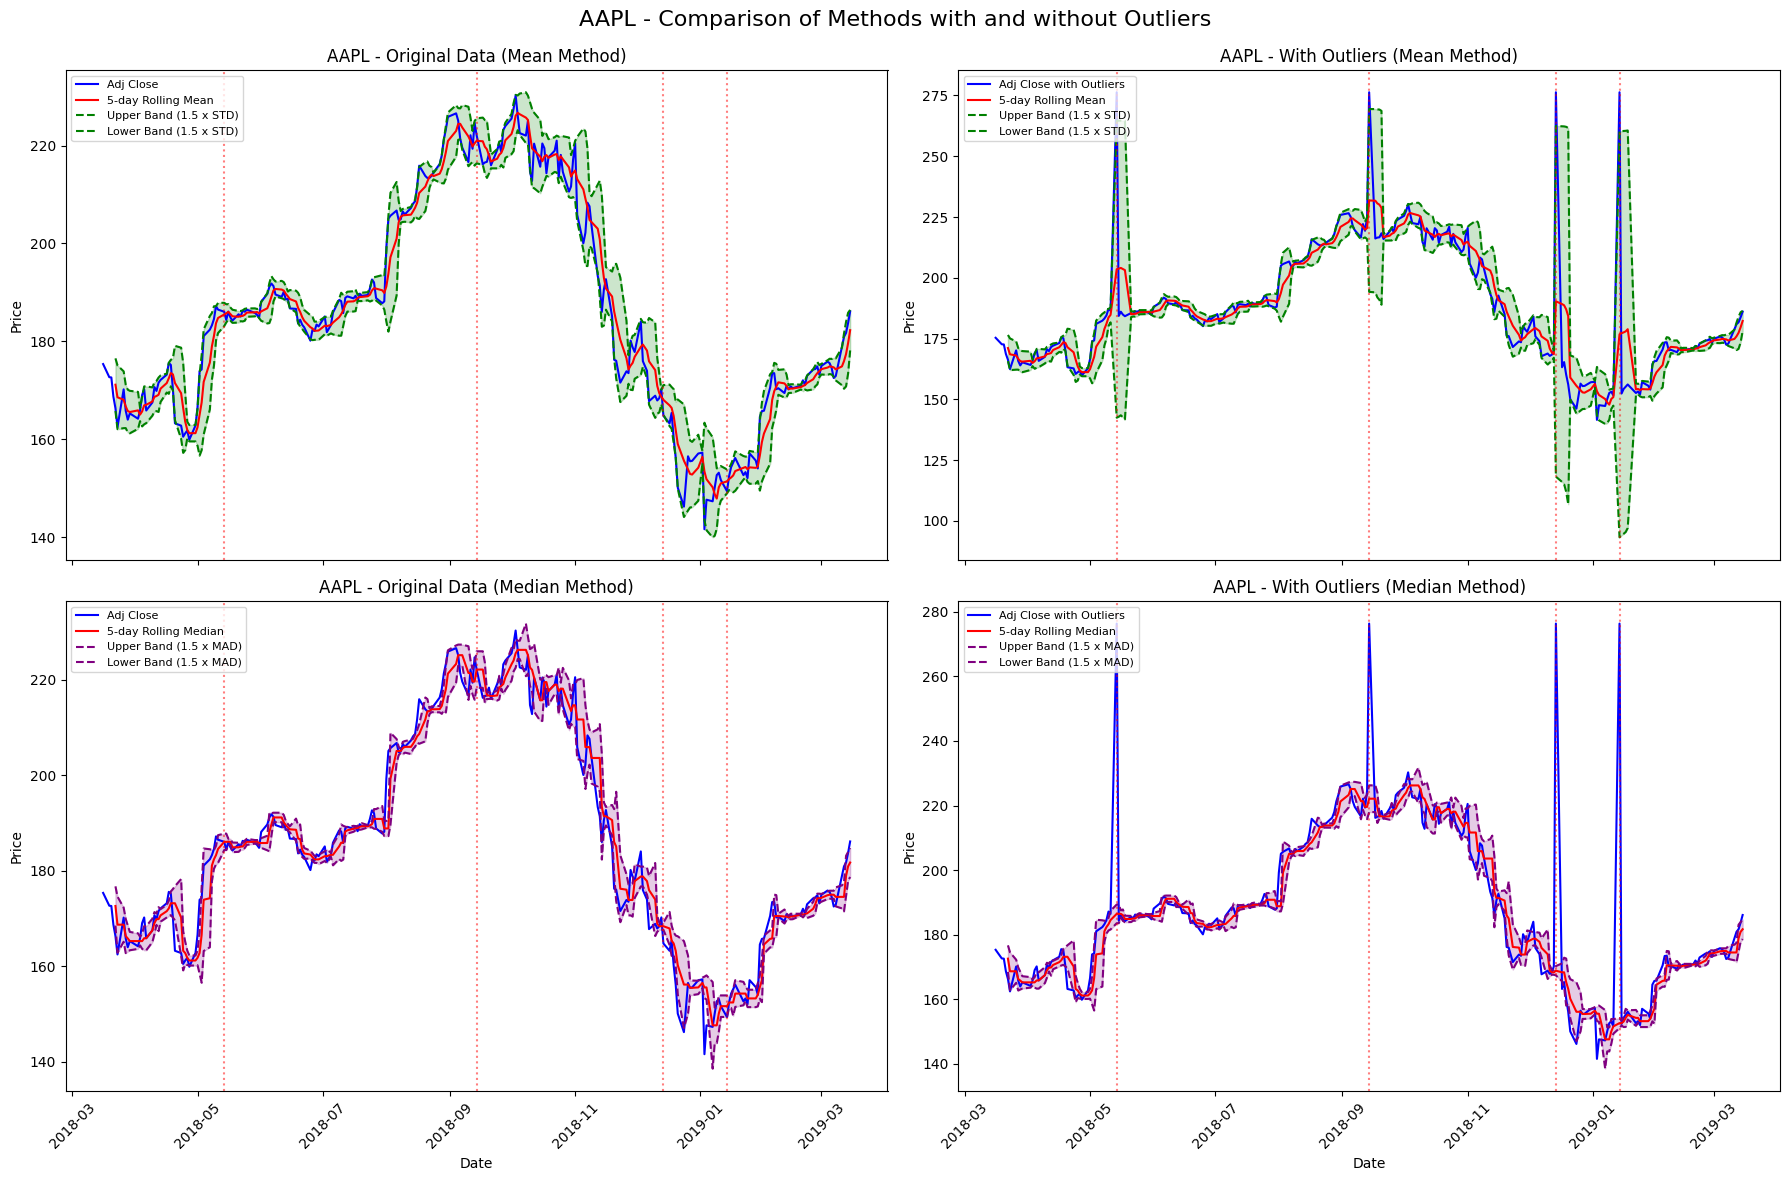

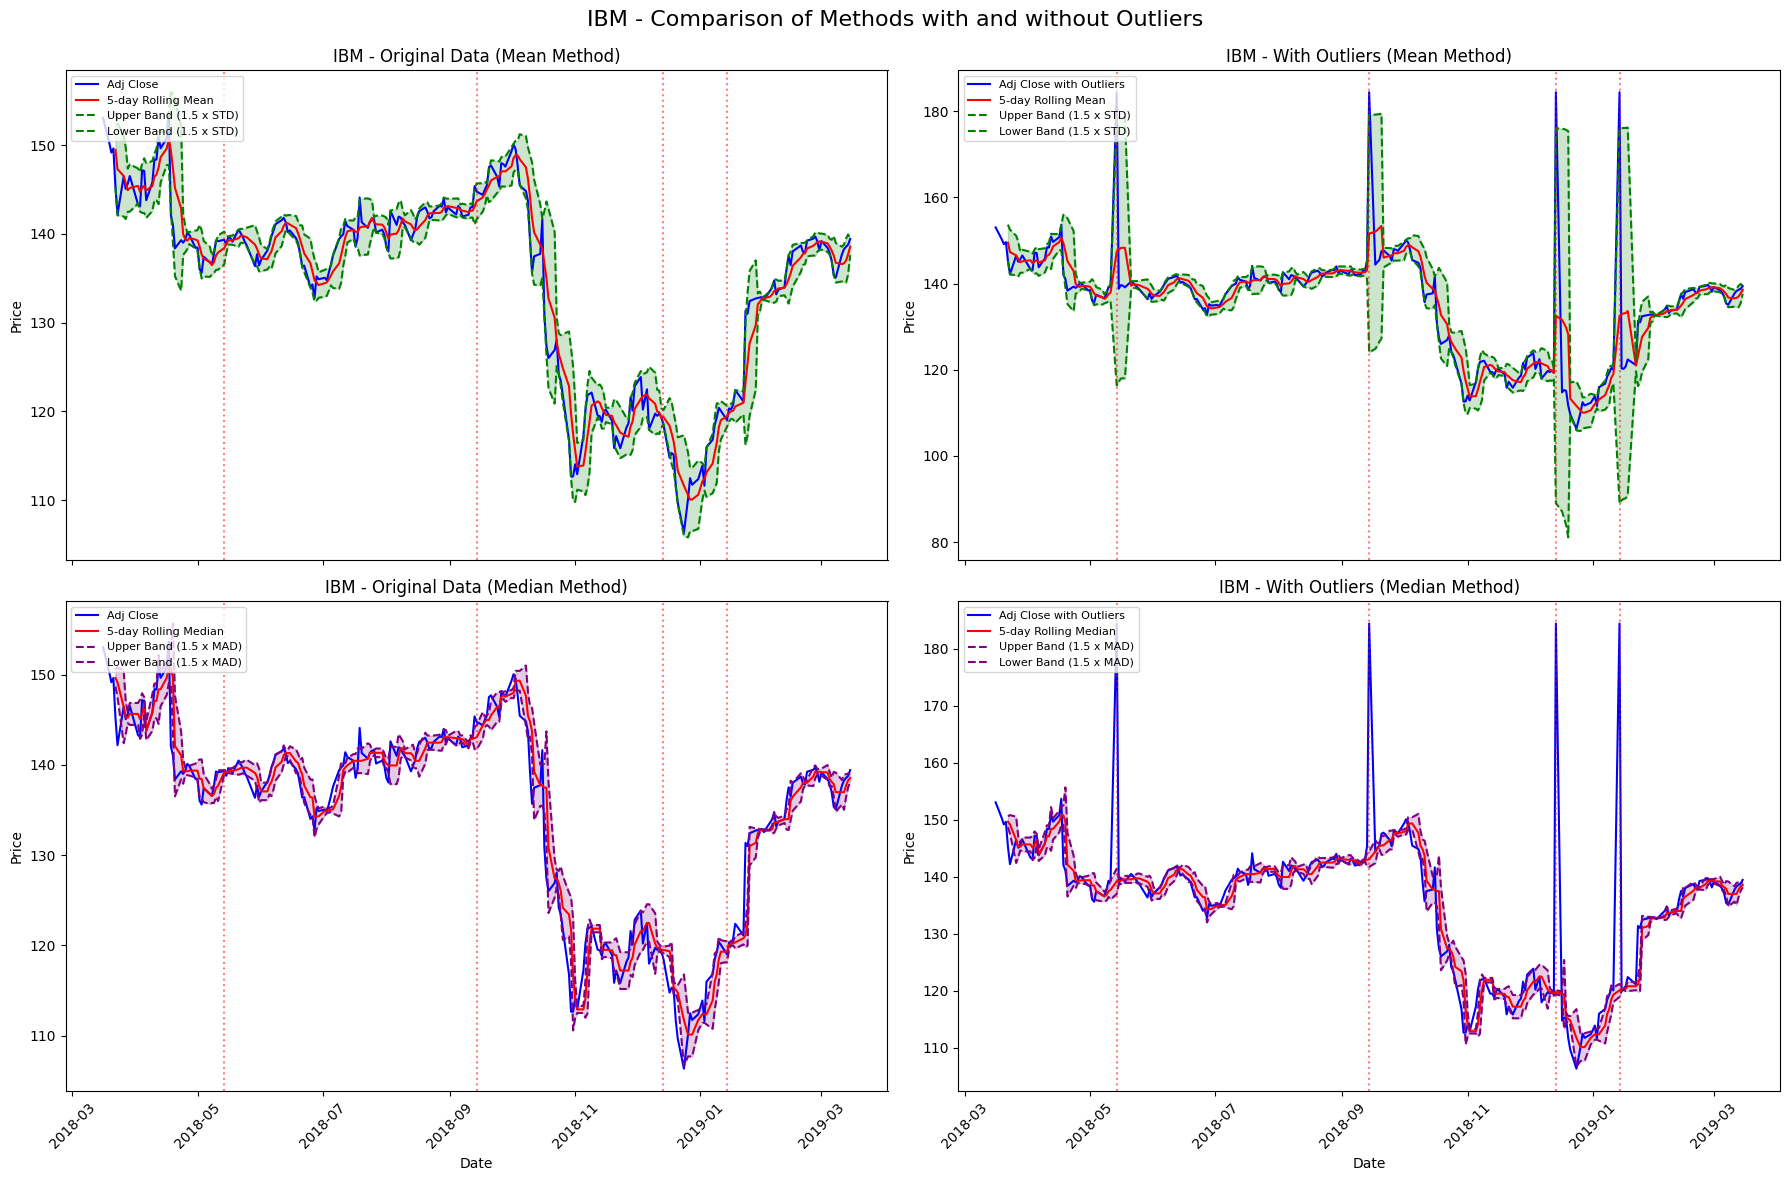

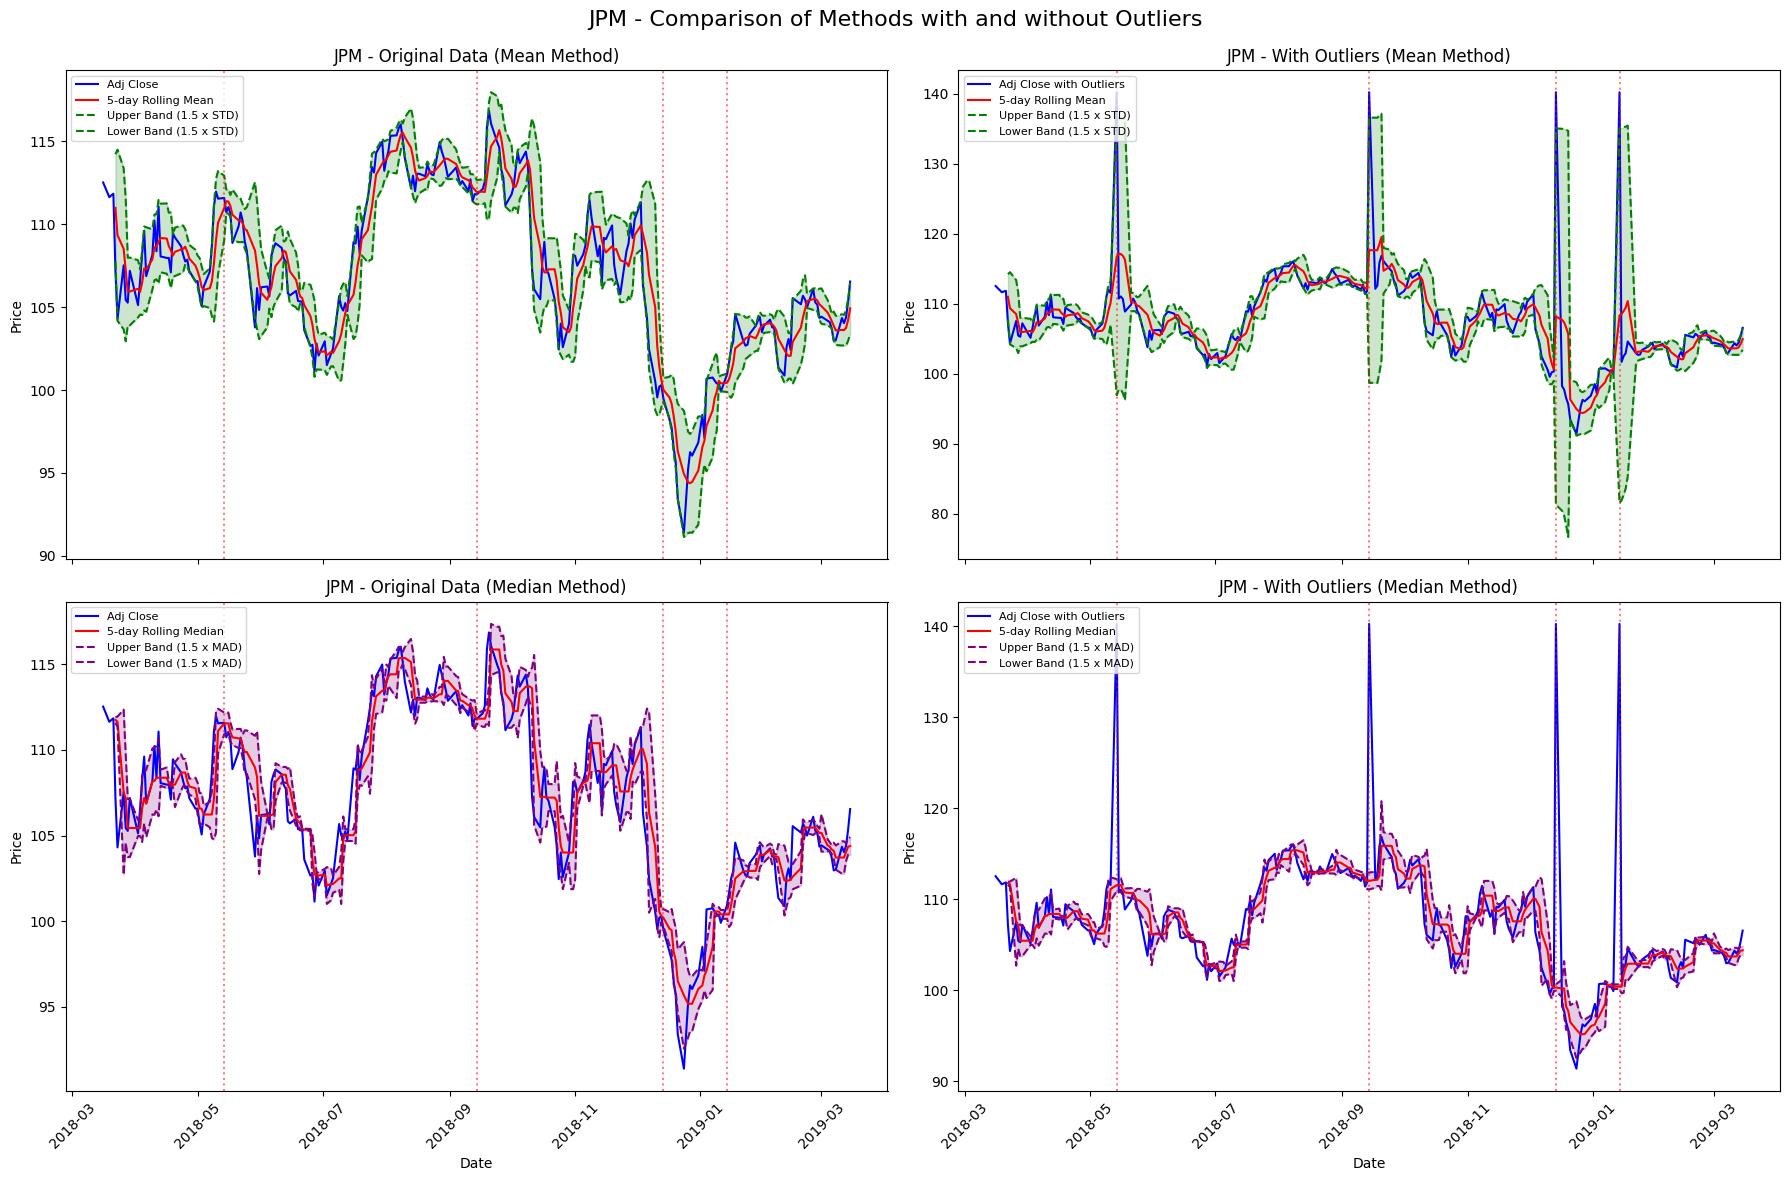

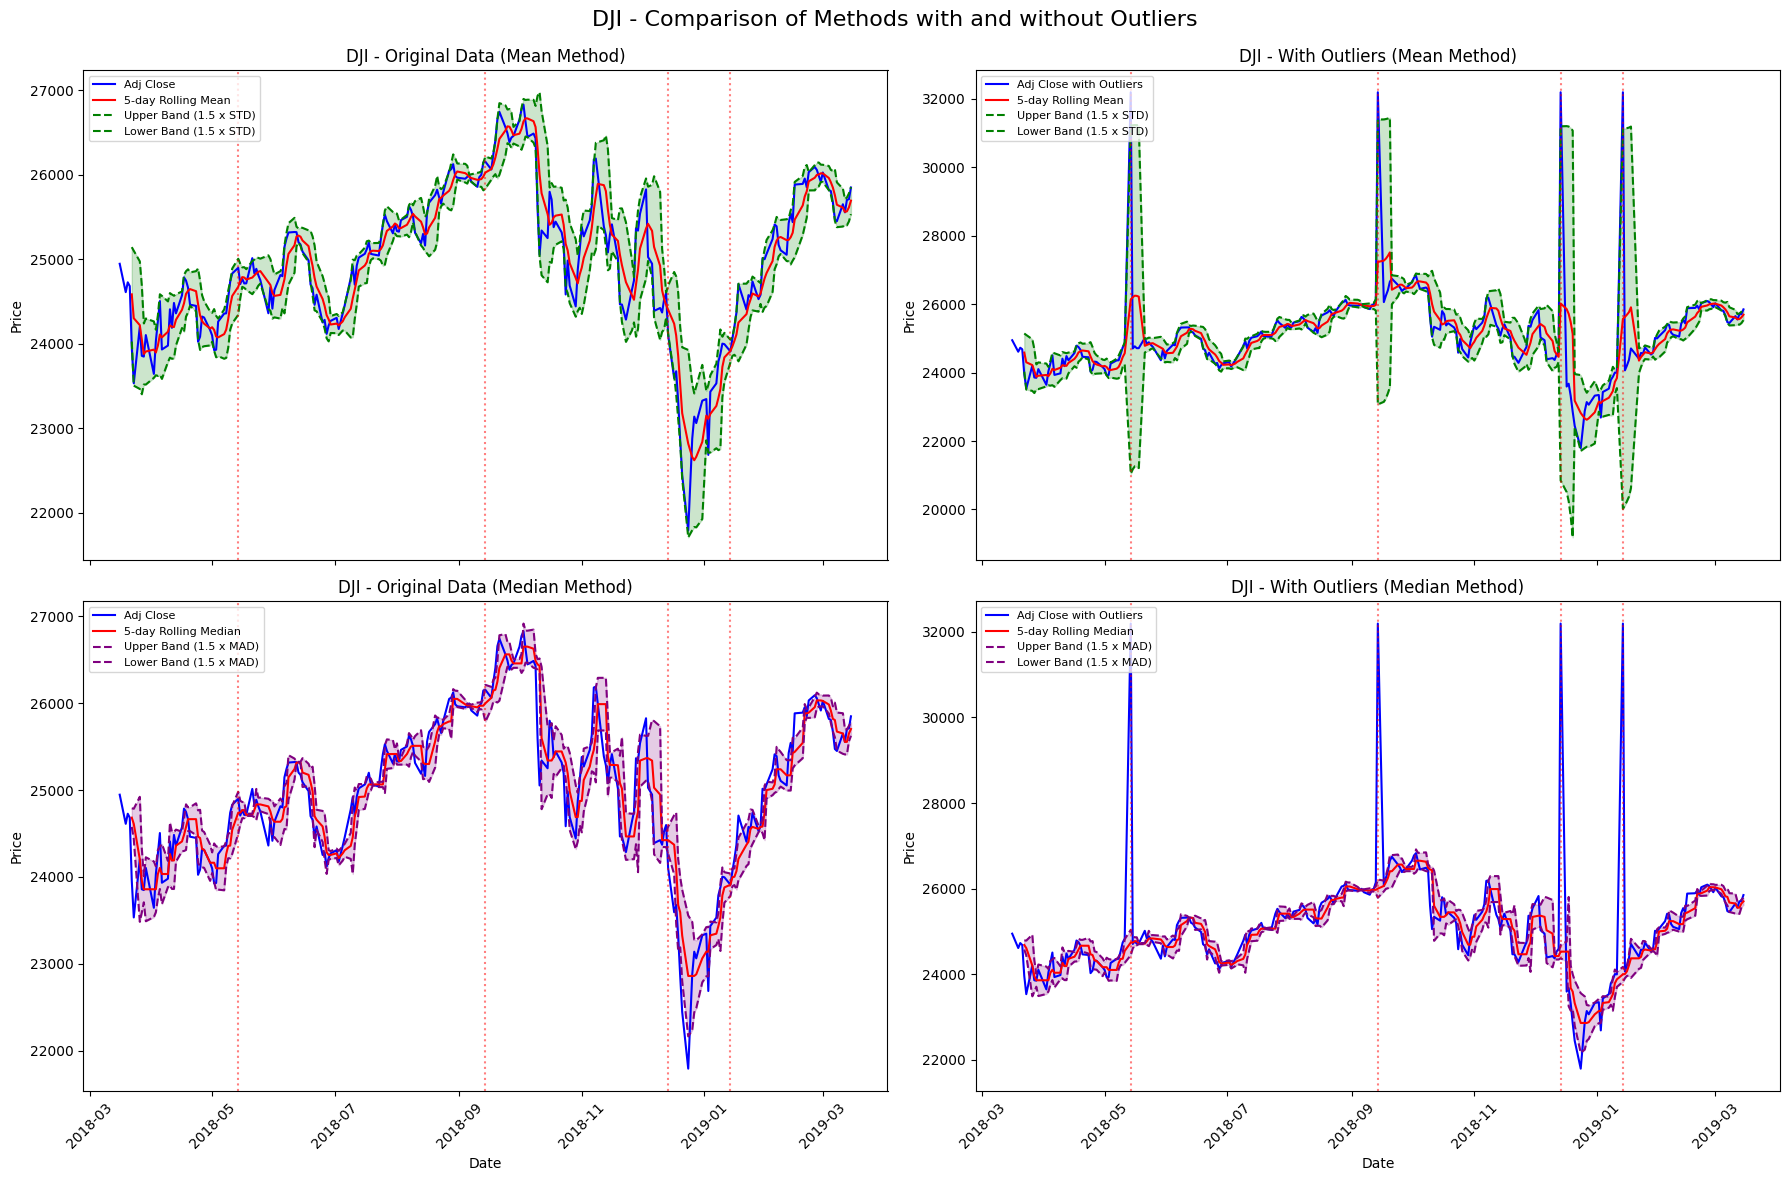

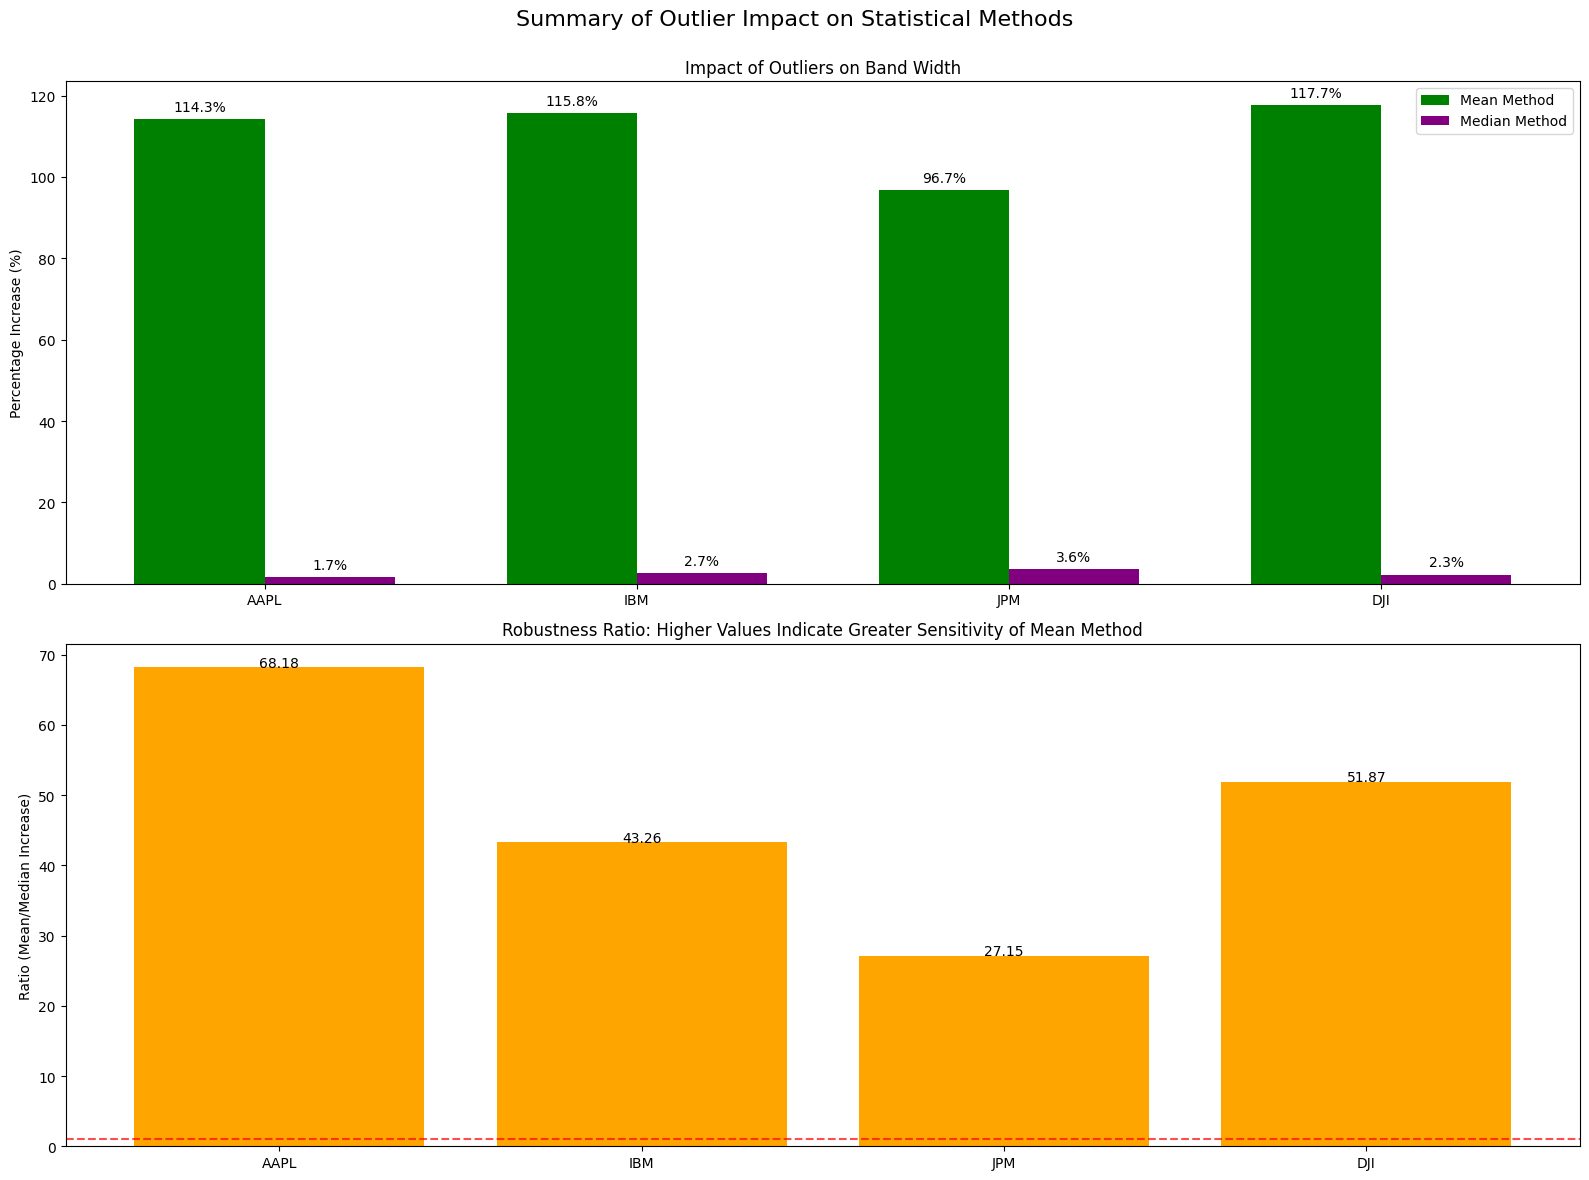

In [25]:
# Create copies of original dataframes to preserve original data
aapl_outlier = aapl.copy()
ibm_outlier = ibm.copy()
jpm_outlier = jpm.copy()
dji_outlier = dji.copy()

# Define outlier dates
outlier_dates = ['2018-05-14', '2018-09-14', '2018-12-14', '2019-01-14']

# Function to introduce outliers
def introduce_outliers(df, dates, factor=1.2):
    """
    Introduce outliers into the dataframe at specified dates.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to modify
    dates : list
        List of dates where outliers should be introduced
    factor : float
        Multiplier for the maximum value to create outliers
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with outliers introduced
    """
    # Find the maximum value in Adj Close
    max_value = df['Adj Close'].max()
    
    # Create outlier value
    outlier_value = max_value * factor
    
    # Introduce outliers at specified dates
    for date in dates:
        if date in df.index:
            df.loc[date, 'Adj Close'] = outlier_value
            print(f"Outlier introduced at {date}: {outlier_value:.2f}")
        else:
            # Find closest date if exact date doesn't exist
            closest_date = df.index[df.index.get_indexer([date], method='nearest')[0]]
            df.loc[closest_date, 'Adj Close'] = outlier_value
            print(f"Outlier introduced at {closest_date} (closest to {date}): {outlier_value:.2f}")
    
    return df

# Introduce outliers to each stock
print("Introducing outliers to AAPL:")
aapl_outlier = introduce_outliers(aapl_outlier, outlier_dates)

print("\nIntroducing outliers to IBM:")
ibm_outlier = introduce_outliers(ibm_outlier, outlier_dates)

print("\nIntroducing outliers to JPM:")
jpm_outlier = introduce_outliers(jpm_outlier, outlier_dates)

print("\nIntroducing outliers to DJI:")
dji_outlier = introduce_outliers(dji_outlier, outlier_dates)

# Recalculate daily returns with outliers
aapl_outlier['Daily_Return'] = aapl_outlier['Adj Close'].pct_change()
ibm_outlier['Daily_Return'] = ibm_outlier['Adj Close'].pct_change()
jpm_outlier['Daily_Return'] = jpm_outlier['Adj Close'].pct_change()
dji_outlier['Daily_Return'] = dji_outlier['Adj Close'].pct_change()

# Function to compare original and outlier data with both methods
def compare_with_outliers(original_df, outlier_df, stock_name, window=5, figsize=(18, 12)):
    """
    Compare original data and outlier data using both mean and median methods
    
    Parameters:
    -----------
    original_df : pandas.DataFrame
        Original data without outliers
    outlier_df : pandas.DataFrame
        Data with introduced outliers
    stock_name : str
        Name of the stock for plot titles
    window : int
        Window size for rolling calculations
    figsize : tuple
        Figure size
    
    Returns:
    --------
    matplotlib.figure.Figure
        Figure containing the comparison plots
    """
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize, sharex=True)
    
    # Calculate statistics for original data
    orig_roll_mean = original_df['Adj Close'].rolling(window=window).mean()
    orig_roll_std = original_df['Adj Close'].rolling(window=window).std()
    orig_roll_median = original_df['Adj Close'].rolling(window=window).median()
    orig_roll_mad = original_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Calculate statistics for outlier data
    out_roll_mean = outlier_df['Adj Close'].rolling(window=window).mean()
    out_roll_std = outlier_df['Adj Close'].rolling(window=window).std()
    out_roll_median = outlier_df['Adj Close'].rolling(window=window).median()
    out_roll_mad = outlier_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Plot 1: Original data with mean method
    axes[0, 0].plot(original_df.index, original_df['Adj Close'], label='Adj Close', color='blue')
    axes[0, 0].plot(original_df.index, orig_roll_mean, label=f'{window}-day Rolling Mean', color='red')
    axes[0, 0].plot(original_df.index, orig_roll_mean + 1.5 * orig_roll_std, 
                   label='Upper Band (1.5 x STD)', linestyle='--', color='green')
    axes[0, 0].plot(original_df.index, orig_roll_mean - 1.5 * orig_roll_std, 
                   label='Lower Band (1.5 x STD)', linestyle='--', color='green')
    axes[0, 0].fill_between(original_df.index, 
                          orig_roll_mean + 1.5 * orig_roll_std, 
                          orig_roll_mean - 1.5 * orig_roll_std,
                          alpha=0.2, color='green')
    axes[0, 0].set_title(f'{stock_name} - Original Data (Mean Method)')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].legend(loc='upper left', fontsize=8)
    
    # Plot 2: Outlier data with mean method
    axes[0, 1].plot(outlier_df.index, outlier_df['Adj Close'], label='Adj Close with Outliers', color='blue')
    axes[0, 1].plot(outlier_df.index, out_roll_mean, label=f'{window}-day Rolling Mean', color='red')
    axes[0, 1].plot(outlier_df.index, out_roll_mean + 1.5 * out_roll_std, 
                   label='Upper Band (1.5 x STD)', linestyle='--', color='green')
    axes[0, 1].plot(outlier_df.index, out_roll_mean - 1.5 * out_roll_std, 
                   label='Lower Band (1.5 x STD)', linestyle='--', color='green')
    axes[0, 1].fill_between(outlier_df.index, 
                          out_roll_mean + 1.5 * out_roll_std, 
                          out_roll_mean - 1.5 * out_roll_std,
                          alpha=0.2, color='green')
    axes[0, 1].set_title(f'{stock_name} - With Outliers (Mean Method)')
    axes[0, 1].set_ylabel('Price')
    axes[0, 1].legend(loc='upper left', fontsize=8)
    
    # Plot 3: Original data with median method
    axes[1, 0].plot(original_df.index, original_df['Adj Close'], label='Adj Close', color='blue')
    axes[1, 0].plot(original_df.index, orig_roll_median, label=f'{window}-day Rolling Median', color='red')
    axes[1, 0].plot(original_df.index, orig_roll_median + 1.5 * orig_roll_mad, 
                   label='Upper Band (1.5 x MAD)', linestyle='--', color='purple')
    axes[1, 0].plot(original_df.index, orig_roll_median - 1.5 * orig_roll_mad, 
                   label='Lower Band (1.5 x MAD)', linestyle='--', color='purple')
    axes[1, 0].fill_between(original_df.index, 
                          orig_roll_median + 1.5 * orig_roll_mad, 
                          orig_roll_median - 1.5 * orig_roll_mad,
                          alpha=0.2, color='purple')
    axes[1, 0].set_title(f'{stock_name} - Original Data (Median Method)')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Price')
    axes[1, 0].legend(loc='upper left', fontsize=8)
    
    # Plot 4: Outlier data with median method
    axes[1, 1].plot(outlier_df.index, outlier_df['Adj Close'], label='Adj Close with Outliers', color='blue')
    axes[1, 1].plot(outlier_df.index, out_roll_median, label=f'{window}-day Rolling Median', color='red')
    axes[1, 1].plot(outlier_df.index, out_roll_median + 1.5 * out_roll_mad, 
                   label='Upper Band (1.5 x MAD)', linestyle='--', color='purple')
    axes[1, 1].plot(outlier_df.index, out_roll_median - 1.5 * out_roll_mad, 
                   label='Lower Band (1.5 x MAD)', linestyle='--', color='purple')
    axes[1, 1].fill_between(outlier_df.index, 
                          out_roll_median + 1.5 * out_roll_mad, 
                          out_roll_median - 1.5 * out_roll_mad,
                          alpha=0.2, color='purple')
    axes[1, 1].set_title(f'{stock_name} - With Outliers (Median Method)')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Price')
    axes[1, 1].legend(loc='upper left', fontsize=8)
    
    # Format x-axis dates
    for ax in axes.flat:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.setp(ax.get_xticklabels(), rotation=45)
    
    # Mark outlier dates with vertical lines
    for date_str in outlier_dates:
        date_obj = pd.to_datetime(date_str)
        for ax in axes.flat:
            if date_obj in outlier_df.index:
                ax.axvline(x=date_obj, color='red', linestyle=':', alpha=0.5)
            else:
                closest_date = outlier_df.index[outlier_df.index.get_indexer([date_obj], method='nearest')[0]]
                ax.axvline(x=closest_date, color='red', linestyle=':', alpha=0.5)
    
    plt.suptitle(f'{stock_name} - Comparison of Methods with and without Outliers', fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.93)
    
    return fig

# Compare each stock
aapl_comp_fig = compare_with_outliers(aapl, aapl_outlier, 'AAPL')
ibm_comp_fig = compare_with_outliers(ibm, ibm_outlier, 'IBM')
jpm_comp_fig = compare_with_outliers(jpm, jpm_outlier, 'JPM')
dji_comp_fig = compare_with_outliers(dji, dji_outlier, 'DJI')

# Save figures
aapl_comp_fig.savefig('AAPL_outlier_comparison.png', dpi=300, bbox_inches='tight')
ibm_comp_fig.savefig('IBM_outlier_comparison.png', dpi=300, bbox_inches='tight')
jpm_comp_fig.savefig('JPM_outlier_comparison.png', dpi=300, bbox_inches='tight')
dji_comp_fig.savefig('DJI_outlier_comparison.png', dpi=300, bbox_inches='tight')

# Quantify the impact of outliers on both methods
def quantify_outlier_impact(original_df, outlier_df, stock_name, window=5):
    """
    Quantify the impact of outliers on rolling statistics
    
    Parameters:
    -----------
    original_df : pandas.DataFrame
        Original data without outliers
    outlier_df : pandas.DataFrame
        Data with introduced outliers
    stock_name : str
        Name of the stock for output
    window : int
        Window size for rolling calculations
    """
    # Calculate statistics for original data
    orig_roll_mean = original_df['Adj Close'].rolling(window=window).mean()
    orig_roll_std = original_df['Adj Close'].rolling(window=window).std()
    orig_roll_median = original_df['Adj Close'].rolling(window=window).median()
    orig_roll_mad = original_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Calculate statistics for outlier data
    out_roll_mean = outlier_df['Adj Close'].rolling(window=window).mean()
    out_roll_std = outlier_df['Adj Close'].rolling(window=window).std()
    out_roll_median = outlier_df['Adj Close'].rolling(window=window).median()
    out_roll_mad = outlier_df['Adj Close'].rolling(window=window).apply(rolling_mad)
    
    # Calculate band widths
    orig_mean_band_width = (orig_roll_mean + 1.5 * orig_roll_std - 
                           (orig_roll_mean - 1.5 * orig_roll_std)).mean()
    out_mean_band_width = (out_roll_mean + 1.5 * out_roll_std - 
                          (out_roll_mean - 1.5 * out_roll_std)).mean()
    
    orig_median_band_width = (orig_roll_median + 1.5 * orig_roll_mad - 
                             (orig_roll_median - 1.5 * orig_roll_mad)).mean()
    out_median_band_width = (out_roll_median + 1.5 * out_roll_mad - 
                            (out_roll_median - 1.5 * out_roll_mad)).mean()
    
    # Calculate percentage increase in band width
    mean_band_pct_increase = ((out_mean_band_width / orig_mean_band_width) - 1) * 100
    median_band_pct_increase = ((out_median_band_width / orig_median_band_width) - 1) * 100
    
    # Calculate outside bands observations
    orig_outside_mean = ((original_df['Adj Close'] > orig_roll_mean + 1.5 * orig_roll_std) | 
                       (original_df['Adj Close'] < orig_roll_mean - 1.5 * orig_roll_std)).sum()
    out_outside_mean = ((outlier_df['Adj Close'] > out_roll_mean + 1.5 * out_roll_std) | 
                      (outlier_df['Adj Close'] < out_roll_mean - 1.5 * out_roll_std)).sum()
    
    orig_outside_median = ((original_df['Adj Close'] > orig_roll_median + 1.5 * orig_roll_mad) | 
                         (original_df['Adj Close'] < orig_roll_median - 1.5 * orig_roll_mad)).sum()
    out_outside_median = ((outlier_df['Adj Close'] > out_roll_median + 1.5 * out_roll_mad) | 
                        (outlier_df['Adj Close'] < out_roll_median - 1.5 * out_roll_mad)).sum()
    
    # Print results
    print(f"\n{stock_name} - Impact of Outliers:")
    print("-" * 50)
    print(f"Mean Method Band Width (Original): {orig_mean_band_width:.2f}")
    print(f"Mean Method Band Width (With Outliers): {out_mean_band_width:.2f}")
    print(f"Mean Method Band Width Increase: {mean_band_pct_increase:.2f}%")
    print(f"Median Method Band Width (Original): {orig_median_band_width:.2f}")
    print(f"Median Method Band Width (With Outliers): {out_median_band_width:.2f}")
    print(f"Median Method Band Width Increase: {median_band_pct_increase:.2f}%")
    print(f"Robustness Ratio (Mean/Median Increase): {mean_band_pct_increase/median_band_pct_increase:.2f}")
    print(f"\nPoints Outside Mean Bands (Original): {orig_outside_mean}")
    print(f"Points Outside Mean Bands (With Outliers): {out_outside_mean}")
    print(f"Points Outside Median Bands (Original): {orig_outside_median}")
    print(f"Points Outside Median Bands (With Outliers): {out_outside_median}")

# Analyze impact for each stock
print("\n===== QUANTIFYING THE IMPACT OF OUTLIERS =====")
quantify_outlier_impact(aapl, aapl_outlier, 'AAPL')
quantify_outlier_impact(ibm, ibm_outlier, 'IBM')
quantify_outlier_impact(jpm, jpm_outlier, 'JPM')
quantify_outlier_impact(dji, dji_outlier, 'DJI')

# Create a summary comparison figure
def plot_outlier_impact_summary(stock_dict, outlier_dict, figsize=(16, 12)):
    """
    Create a summary figure showing the impact of outliers across stocks
    
    Parameters:
    -----------
    stock_dict : dict
        Dictionary mapping stock names to original dataframes
    outlier_dict : dict
        Dictionary mapping stock names to dataframes with outliers
    figsize : tuple
        Figure size
    
    Returns:
    --------
    matplotlib.figure.Figure
        Summary figure
    """
    # Prepare data containers
    stock_names = list(stock_dict.keys())
    mean_band_increase = []
    median_band_increase = []
    robustness_ratios = []
    
    for name in stock_names:
        orig_df = stock_dict[name]
        out_df = outlier_dict[name]
        
        # Calculate statistics for original data
        orig_roll_mean = orig_df['Adj Close'].rolling(window=5).mean()
        orig_roll_std = orig_df['Adj Close'].rolling(window=5).std()
        orig_roll_median = orig_df['Adj Close'].rolling(window=5).median()
        orig_roll_mad = orig_df['Adj Close'].rolling(window=5).apply(rolling_mad)
        
        # Calculate statistics for outlier data
        out_roll_mean = out_df['Adj Close'].rolling(window=5).mean()
        out_roll_std = out_df['Adj Close'].rolling(window=5).std()
        out_roll_median = out_df['Adj Close'].rolling(window=5).median()
        out_roll_mad = out_df['Adj Close'].rolling(window=5).apply(rolling_mad)
        
        # Calculate band widths
        orig_mean_band_width = (orig_roll_mean + 1.5 * orig_roll_std - 
                               (orig_roll_mean - 1.5 * orig_roll_std)).mean()
        out_mean_band_width = (out_roll_mean + 1.5 * out_roll_std - 
                              (out_roll_mean - 1.5 * out_roll_std)).mean()
        
        orig_median_band_width = (orig_roll_median + 1.5 * orig_roll_mad - 
                                 (orig_roll_median - 1.5 * orig_roll_mad)).mean()
        out_median_band_width = (out_roll_median + 1.5 * out_roll_mad - 
                                (out_roll_median - 1.5 * out_roll_mad)).mean()
        
        # Calculate percentage increase
        mean_increase = ((out_mean_band_width / orig_mean_band_width) - 1) * 100
        median_increase = ((out_median_band_width / orig_median_band_width) - 1) * 100
        
        mean_band_increase.append(mean_increase)
        median_band_increase.append(median_increase)
        robustness_ratios.append(mean_increase / median_increase)
    
    # Create the figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    # Plot band width percentage increases
    x = np.arange(len(stock_names))
    width = 0.35
    
    ax1.bar(x - width/2, mean_band_increase, width, label='Mean Method', color='green')
    ax1.bar(x + width/2, median_band_increase, width, label='Median Method', color='purple')
    
    ax1.set_ylabel('Percentage Increase (%)')
    ax1.set_title('Impact of Outliers on Band Width')
    ax1.set_xticks(x)
    ax1.set_xticklabels(stock_names)
    ax1.legend()
    
    # Add value labels
    for i, v in enumerate(mean_band_increase):
        ax1.text(i - width/2, v + 2, f'{v:.1f}%', ha='center')
    
    for i, v in enumerate(median_band_increase):
        ax1.text(i + width/2, v + 2, f'{v:.1f}%', ha='center')
    
    # Plot robustness ratio
    ax2.bar(x, robustness_ratios, color='orange')
    ax2.set_ylabel('Ratio (Mean/Median Increase)')
    ax2.set_title('Robustness Ratio: Higher Values Indicate Greater Sensitivity of Mean Method')
    ax2.set_xticks(x)
    ax2.set_xticklabels(stock_names)
    
    # Add value labels
    for i, v in enumerate(robustness_ratios):
        ax2.text(i, v + 0.1, f'{v:.2f}', ha='center')
    
    # Add a horizontal line at ratio = 1
    ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7)
    
    plt.suptitle('Summary of Outlier Impact on Statistical Methods', fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.92)
    
    return fig

# Create and save summary figure
stock_dict = {'AAPL': aapl, 'IBM': ibm, 'JPM': jpm, 'DJI': dji}
outlier_dict = {'AAPL': aapl_outlier, 'IBM': ibm_outlier, 'JPM': jpm_outlier, 'DJI': dji_outlier}

summary_fig = plot_outlier_impact_summary(stock_dict, outlier_dict)
summary_fig.savefig('outlier_impact_summary.png', dpi=300, bbox_inches='tight')
plt.show()

In this analysis, we compared **Rolling Mean and Rolling Median** using data from AAPL, IBM, JPM, and DJI to evaluate their performance in handling outliers. **The results indicate that the Rolling Mean method is highly sensitive to outliers, whereas the Rolling Median method remains stable and nearly unaffected.**

After introducing outliers on **2018-05-14, 2018-09-14, 2018-12-14, and 2019-01-14** (with values set to 1.2 × the maximum value), **the Rolling Mean method experienced a significant expansion in bandwidth, with the fluctuation range severely exaggerated, increasing by more than 100% in some cases (e.g., AAPL +114.3%, IBM +115.8%, DJI +117.7%)**. This distortion made market volatility appear much more dramatic than it actually was, leading to misleading trend assessments. Particularly in assets like AAPL and DJI, the impact of outliers completely distorted market signals, causing an extreme expansion in the Rolling Mean-based volatility bands, which could mislead traders. In contrast, the Rolling Median method exhibited only a minor bandwidth increase (1.7% - 3.6%), demonstrating its robustness and ability to provide a more stable representation of actual market fluctuations.

From the visual analysis, **the Rolling Mean method with outliers (top right) showed a significantly widened volatility band compared to the original data (top left), rendering short-term trend signals ineffective**, most notably in DJI and AAPL. Meanwhile, **the Rolling Median method with outliers (bottom right) remained largely consistent with the original data (bottom left), as the price curve was slightly affected, but the bandwidth remained nearly unchanged, preserving trend stability**. This suggests that the Rolling Median method can still provide an accurate assessment of market fluctuations even in the presence of outliers, whereas the Rolling Mean method may lead to severe misinterpretations.

Overall, **while the Rolling Mean method is still viable in low-volatility and stable market conditions**, the **Rolling Median method is more suitable for high-volatility periods, such as financial crises or policy shocks**, as it effectively avoids misleading trend assessments caused by extreme data points. Thus, **for trend-following strategies, the Rolling Mean method may be preferable, whereas for risk management and statistical arbitrage, the Rolling Median method offers greater advantages**. Ultimately, in highly volatile markets or situations where extreme data points are expected, **it is recommended to prioritize the Rolling Median method for more stable and reliable market analysis.**

5. Generate a box plot for the *adj. close* for each stock, describe the information the box plot conveys and elaborate on any other observations you may have.

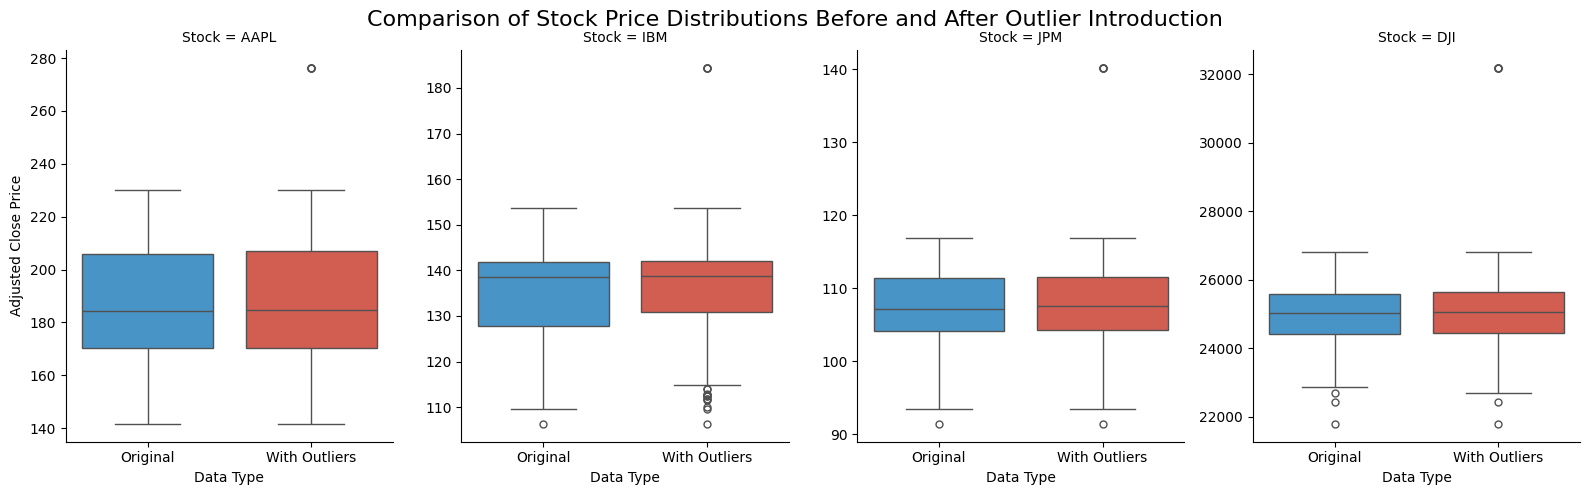

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

aapl_df = pd.DataFrame({
    'Stock': 'AAPL',
    'Adjusted Close Price': aapl['Adj Close'],
    'Data Type': 'Original'
})

ibm_df = pd.DataFrame({
    'Stock': 'IBM',
    'Adjusted Close Price': ibm['Adj Close'],
    'Data Type': 'Original'
})

jpm_df = pd.DataFrame({
    'Stock': 'JPM',
    'Adjusted Close Price': jpm['Adj Close'],
    'Data Type': 'Original'
})

dji_df = pd.DataFrame({
    'Stock': 'DJI',
    'Adjusted Close Price': dji['Adj Close'],
    'Data Type': 'Original'
})

aapl_outlier_df = pd.DataFrame({
    'Stock': 'AAPL',
    'Adjusted Close Price': aapl_outlier['Adj Close'],
    'Data Type': 'With Outliers'
})

ibm_outlier_df = pd.DataFrame({
    'Stock': 'IBM',
    'Adjusted Close Price': ibm_outlier['Adj Close'],
    'Data Type': 'With Outliers'
})

jpm_outlier_df = pd.DataFrame({
    'Stock': 'JPM',
    'Adjusted Close Price': jpm_outlier['Adj Close'],
    'Data Type': 'With Outliers'
})

dji_outlier_df = pd.DataFrame({
    'Stock': 'DJI',
    'Adjusted Close Price': dji_outlier['Adj Close'],
    'Data Type': 'With Outliers'
})

all_comparison_data = pd.concat([
    aapl_df, ibm_df, jpm_df, dji_df,
    aapl_outlier_df, ibm_outlier_df, jpm_outlier_df, dji_outlier_df
])

g = sns.catplot(
    data=all_comparison_data,
    x='Data Type',
    y='Adjusted Close Price',
    hue='Data Type',
    col='Stock',
    kind='box',
    height=5,
    aspect=0.8,
    palette=['#3498db', '#e74c3c'],
    sharey=False  
)

g.fig.suptitle('Comparison of Stock Price Distributions Before and After Outlier Introduction', fontsize=16)
g.fig.subplots_adjust(top=0.9) 

plt.savefig('stock_boxplots_comparison_facet.png', dpi=300, bbox_inches='tight')
plt.show()


The box plot illustrates the distribution of the adjusted close prices for AAPL, IBM, JPM, and DJI, comparing the original data with the dataset after introducing outliers. It visually highlights the impact of outliers on statistical characteristics. The plot shows that after adding outliers (manually set at 1.2× the maximum value), all four stocks exhibit extreme high values. However, the median and interquartile range (IQR) remain almost unaffected. This indicates that while the **Rolling Mean method** is highly sensitive to outliers, leading to an exaggerated perception of market volatility, the **Rolling Median method** remains stable, providing a more accurate reflection of market conditions.

Specifically, AAPL and DJI are the most affected by outliers, as their maximum values significantly increase, which could mislead trend analysis. Meanwhile, IBM and JPM experience relatively smaller fluctuations, but their lower-end outliers increase, particularly in IBM, where multiple anomalies appear in the lower price range. This suggests that in market data analysis, the **Rolling Mean method may cause misinterpretations in high-volatility markets (such as AAPL and DJI), whereas the Rolling Median method is more suitable for stable market fluctuation assessments**. 

Therefore, in market environments where outliers are likely present, it is recommended to prioritize the **Rolling Median method** for more reliable statistical analysis.

## 4.2 Robust Estimators

This section involves the implementation, analysis, and assessment of the following estimators:

- **Robust location estimator:** median
- **Robust scale estimator:** IQR (Interquartile range) and MAD (Median Absolute Deviation)

1. Create a Python function for each estimator type that takes a `pandas.Series` as input and returns the estimator value as output.

In [41]:

def robust_location_median(data_series):
    """
    A robust location estimator using median.
    
    Parameters:
    -----------
    data_series : pandas.Series
        Input data series
        
    Returns:
    --------
    float
        Median value of the series
    """
    return data_series.median()

print("Testing robust location estimator (Median) on all stocks:")
print("-" * 60)

# AAPL
median_aapl = robust_location_median(aapl['Adj Close'])
print(f"AAPL Adj Close - Median: {median_aapl:.4f}")
print(f"AAPL Adj Close - Mean: {aapl['Adj Close'].mean():.4f}")
print(f"AAPL with outliers - Median: {robust_location_median(aapl_outlier['Adj Close']):.4f}")
print(f"AAPL with outliers - Mean: {aapl_outlier['Adj Close'].mean():.4f}")
print()

# IBM
median_ibm = robust_location_median(ibm['Adj Close'])
print(f"IBM Adj Close - Median: {median_ibm:.4f}")
print(f"IBM Adj Close - Mean: {ibm['Adj Close'].mean():.4f}")
print(f"IBM with outliers - Median: {robust_location_median(ibm_outlier['Adj Close']):.4f}")
print(f"IBM with outliers - Mean: {ibm_outlier['Adj Close'].mean():.4f}")
print()

# JPM
median_jpm = robust_location_median(jpm['Adj Close'])
print(f"JPM Adj Close - Median: {median_jpm:.4f}")
print(f"JPM Adj Close - Mean: {jpm['Adj Close'].mean():.4f}")
print(f"JPM with outliers - Median: {robust_location_median(jpm_outlier['Adj Close']):.4f}")
print(f"JPM with outliers - Mean: {jpm_outlier['Adj Close'].mean():.4f}")
print()

# DJI
median_dji = robust_location_median(dji['Adj Close'])
print(f"DJI Adj Close - Median: {median_dji:.4f}")
print(f"DJI Adj Close - Mean: {dji['Adj Close'].mean():.4f}")
print(f"DJI with outliers - Median: {robust_location_median(dji_outlier['Adj Close']):.4f}")
print(f"DJI with outliers - Mean: {dji_outlier['Adj Close'].mean():.4f}")


Testing robust location estimator (Median) on all stocks:
------------------------------------------------------------
AAPL Adj Close - Median: 184.3518
AAPL Adj Close - Mean: 186.1743
AAPL with outliers - Median: 184.5498
AAPL with outliers - Mean: 187.7003

IBM Adj Close - Median: 138.5664
IBM Adj Close - Mean: 134.9028
IBM with outliers - Median: 138.7016
IBM with outliers - Mean: 135.7633

JPM Adj Close - Median: 107.2193
JPM Adj Close - Mean: 107.2626
JPM with outliers - Median: 107.5069
JPM with outliers - Mean: 107.8088

DJI Adj Close - Median: 25044.2891
DJI Adj Close - Mean: 24999.1536
DJI with outliers - Median: 25058.1191
DJI with outliers - Mean: 25117.5275


In [42]:
def robust_scale_iqr(data_series):
    """
    A robust scale estimator using interquartile range (IQR).
    
    Parameters:
    -----------
    data_series : pandas.Series
        Input data series
        
    Returns:
    --------
    float
        Interquartile range (Q3 - Q1) of the series
    """
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    return q3 - q1

print("Testing robust scale estimator (IQR) on all stocks:")
print("-" * 60)

# AAPL
iqr_aapl = robust_scale_iqr(aapl['Adj Close'])
print(f"AAPL Adj Close - IQR: {iqr_aapl:.4f}")
print(f"AAPL Adj Close - STD: {aapl['Adj Close'].std():.4f}")
print(f"AAPL Adj Close - IQR/1.35: {iqr_aapl/1.35:.4f}")
print(f"AAPL with outliers - IQR: {robust_scale_iqr(aapl_outlier['Adj Close']):.4f}")
print(f"AAPL with outliers - STD: {aapl_outlier['Adj Close'].std():.4f}")
print()

# IBM
iqr_ibm = robust_scale_iqr(ibm['Adj Close'])
print(f"IBM Adj Close - IQR: {iqr_ibm:.4f}")
print(f"IBM Adj Close - STD: {ibm['Adj Close'].std():.4f}")
print(f"IBM Adj Close - IQR/1.35: {iqr_ibm/1.35:.4f}")
print(f"IBM with outliers - IQR: {robust_scale_iqr(ibm_outlier['Adj Close']):.4f}")
print(f"IBM with outliers - STD: {ibm_outlier['Adj Close'].std():.4f}")
print()

# JPM
iqr_jpm = robust_scale_iqr(jpm['Adj Close'])
print(f"JPM Adj Close - IQR: {iqr_jpm:.4f}")
print(f"JPM Adj Close - STD: {jpm['Adj Close'].std():.4f}")
print(f"JPM Adj Close - IQR/1.35: {iqr_jpm/1.35:.4f}")
print(f"JPM with outliers - IQR: {robust_scale_iqr(jpm_outlier['Adj Close']):.4f}")
print(f"JPM with outliers - STD: {jpm_outlier['Adj Close'].std():.4f}")
print()

# DJI
iqr_dji = robust_scale_iqr(dji['Adj Close'])
print(f"DJI Adj Close - IQR: {iqr_dji:.4f}")
print(f"DJI Adj Close - STD: {dji['Adj Close'].std():.4f}")
print(f"DJI Adj Close - IQR/1.35: {iqr_dji/1.35:.4f}")
print(f"DJI with outliers - IQR: {robust_scale_iqr(dji_outlier['Adj Close']):.4f}")
print(f"DJI with outliers - STD: {dji_outlier['Adj Close'].std():.4f}")

Testing robust scale estimator (IQR) on all stocks:
------------------------------------------------------------
AAPL Adj Close - IQR: 35.6854
AAPL Adj Close - STD: 21.9047
AAPL Adj Close - IQR/1.35: 26.4337
AAPL with outliers - IQR: 36.5766
AAPL with outliers - STD: 24.3948

IBM Adj Close - IQR: 14.1039
IBM Adj Close - STD: 10.6716
IBM Adj Close - IQR/1.35: 10.4474
IBM with outliers - IQR: 11.0395
IBM with outliers - STD: 12.2391

JPM Adj Close - IQR: 7.2224
JPM Adj Close - STD: 4.8333
JPM Adj Close - IQR/1.35: 5.3500
JPM with outliers - IQR: 7.2930
JPM with outliers - STD: 6.3158

DJI Adj Close - IQR: 1158.1553
DJI Adj Close - STD: 859.1321
DJI Adj Close - IQR/1.35: 857.8928
DJI with outliers - IQR: 1190.3604
DJI with outliers - STD: 1240.5447


In [43]:
def robust_scale_mad(data_series):
    """
    A robust scale estimator using median absolute deviation (MAD).
    
    Parameters:
    -----------
    data_series : pandas.Series
        Input data series
        
    Returns:
    --------
    float
        Median absolute deviation from the median
    """
    median = data_series.median()
    abs_deviations = (data_series - median).abs()
    return abs_deviations.median()

print("Testing robust scale estimator (MAD) on all stocks:")
print("-" * 60)

# AAPL
mad_aapl = robust_scale_mad(aapl['Adj Close'])
print(f"AAPL Adj Close - MAD: {mad_aapl:.4f}")
print(f"AAPL Adj Close - STD: {aapl['Adj Close'].std():.4f}")
print(f"AAPL Adj Close - MAD*1.4826: {mad_aapl*1.4826:.4f}")
print(f"AAPL with outliers - MAD: {robust_scale_mad(aapl_outlier['Adj Close']):.4f}")
print(f"AAPL with outliers - STD: {aapl_outlier['Adj Close'].std():.4f}")
print()

# IBM
mad_ibm = robust_scale_mad(ibm['Adj Close'])
print(f"IBM Adj Close - MAD: {mad_ibm:.4f}")
print(f"IBM Adj Close - STD: {ibm['Adj Close'].std():.4f}")
print(f"IBM Adj Close - MAD*1.4826: {mad_ibm*1.4826:.4f}")
print(f"IBM with outliers - MAD: {robust_scale_mad(ibm_outlier['Adj Close']):.4f}")
print(f"IBM with outliers - STD: {ibm_outlier['Adj Close'].std():.4f}")
print()

# JPM
mad_jpm = robust_scale_mad(jpm['Adj Close'])
print(f"JPM Adj Close - MAD: {mad_jpm:.4f}")
print(f"JPM Adj Close - STD: {jpm['Adj Close'].std():.4f}")
print(f"JPM Adj Close - MAD*1.4826: {mad_jpm*1.4826:.4f}")
print(f"JPM with outliers - MAD: {robust_scale_mad(jpm_outlier['Adj Close']):.4f}")
print(f"JPM with outliers - STD: {jpm_outlier['Adj Close'].std():.4f}")
print()

# DJI
mad_dji = robust_scale_mad(dji['Adj Close'])
print(f"DJI Adj Close - MAD: {mad_dji:.4f}")
print(f"DJI Adj Close - STD: {dji['Adj Close'].std():.4f}")
print(f"DJI Adj Close - MAD*1.4826: {mad_dji*1.4826:.4f}")
print(f"DJI with outliers - MAD: {robust_scale_mad(dji_outlier['Adj Close']):.4f}")
print(f"DJI with outliers - STD: {dji_outlier['Adj Close'].std():.4f}")

Testing robust scale estimator (MAD) on all stocks:
------------------------------------------------------------
AAPL Adj Close - MAD: 15.4760
AAPL Adj Close - STD: 21.9047
AAPL Adj Close - MAD*1.4826: 22.9448
AAPL with outliers - MAD: 15.6741
AAPL with outliers - STD: 24.3948

IBM Adj Close - MAD: 4.4935
IBM Adj Close - STD: 10.6716
IBM Adj Close - MAD*1.4826: 6.6621
IBM with outliers - MAD: 4.4032
IBM with outliers - STD: 12.2391

JPM Adj Close - MAD: 3.4502
JPM Adj Close - STD: 4.8333
JPM Adj Close - MAD*1.4826: 5.1152
JPM with outliers - MAD: 3.5642
JPM with outliers - STD: 6.3158

DJI Adj Close - MAD: 590.7207
DJI Adj Close - STD: 859.1321
DJI Adj Close - MAD*1.4826: 875.8025
DJI with outliers - MAD: 598.8613
DJI with outliers - STD: 1240.5447


In [ ]:

results_original = pd.DataFrame(index=['AAPL', 'IBM', 'JPM', 'DJI'])

results_original['Median'] = [
    robust_location_median(aapl['Adj Close']),
    robust_location_median(ibm['Adj Close']),
    robust_location_median(jpm['Adj Close']),
    robust_location_median(dji['Adj Close'])
]

results_original['Mean'] = [
    aapl['Adj Close'].mean(),
    ibm['Adj Close'].mean(),
    jpm['Adj Close'].mean(),
    dji['Adj Close'].mean()
]

results_original['IQR'] = [
    robust_scale_iqr(aapl['Adj Close']),
    robust_scale_iqr(ibm['Adj Close']),
    robust_scale_iqr(jpm['Adj Close']),
    robust_scale_iqr(dji['Adj Close'])
]

results_original['MAD'] = [
    robust_scale_mad(aapl['Adj Close']),
    robust_scale_mad(ibm['Adj Close']),
    robust_scale_mad(jpm['Adj Close']),
    robust_scale_mad(dji['Adj Close'])
]

results_original['STD'] = [
    aapl['Adj Close'].std(),
    ibm['Adj Close'].std(),
    jpm['Adj Close'].std(),
    dji['Adj Close'].std()
]

results_outlier = pd.DataFrame(index=['AAPL', 'IBM', 'JPM', 'DJI'])

results_outlier['Median'] = [
    robust_location_median(aapl_outlier['Adj Close']),
    robust_location_median(ibm_outlier['Adj Close']),
    robust_location_median(jpm_outlier['Adj Close']),
    robust_location_median(dji_outlier['Adj Close'])
]

results_outlier['Mean'] = [
    aapl_outlier['Adj Close'].mean(),
    ibm_outlier['Adj Close'].mean(),
    jpm_outlier['Adj Close'].mean(),
    dji_outlier['Adj Close'].mean()
]

results_outlier['IQR'] = [
    robust_scale_iqr(aapl_outlier['Adj Close']),
    robust_scale_iqr(ibm_outlier['Adj Close']),
    robust_scale_iqr(jpm_outlier['Adj Close']),
    robust_scale_iqr(dji_outlier['Adj Close'])
]

results_outlier['MAD'] = [
    robust_scale_mad(aapl_outlier['Adj Close']),
    robust_scale_mad(ibm_outlier['Adj Close']),
    robust_scale_mad(jpm_outlier['Adj Close']),
    robust_scale_mad(dji_outlier['Adj Close'])
]

results_outlier['STD'] = [
    aapl_outlier['Adj Close'].std(),
    ibm_outlier['Adj Close'].std(),
    jpm_outlier['Adj Close'].std(),
    dji_outlier['Adj Close'].std()
]

change_pct = pd.DataFrame(index=['AAPL', 'IBM', 'JPM', 'DJI'])

for column in results_original.columns:
    change_pct[f'{column} % Change'] = (results_outlier[column] / results_original[column] - 1) * 100

print("Estimator values for original data:")
print("-" * 70)
display(results_original)  
print("\nEstimator values for data with outliers:")
print("-" * 70)
display(results_outlier)  

print("\nPercent change in estimators after introducing outliers:")
print("-" * 70)
display(change_pct)  


results = {
    'Original Data': results_original,
    'Data with Outliers': results_outlier,
    'Percent Change': change_pct
}

Estimator values for original data:
----------------------------------------------------------------------


Median          Mean          IQR         MAD         STD
AAPL    184.351776    186.174273    35.685440   15.476044   21.904664
IBM     138.566391    134.902751    14.103938    4.493515   10.671648
JPM     107.219269    107.262590     7.222442    3.450157    4.833316
DJI   25044.289063  24999.153581  1158.155273  590.720703  859.132105


Estimator values for data with outliers:
----------------------------------------------------------------------


Median          Mean          IQR         MAD          STD
AAPL    184.549835    187.700320    36.576599   15.674103    24.394837
IBM     138.701569    135.763253    11.039528    4.403229    12.239146
JPM     107.506935    107.808780     7.292950    3.564179     6.315752
DJI   25058.119141  25117.527467  1190.360351  598.861328  1240.544674


Percent change in estimators after introducing outliers:
----------------------------------------------------------------------


Median % Change  Mean % Change  IQR % Change  MAD % Change  STD % Change
AAPL         0.107435       0.819688      2.497262      1.279778     11.368231
IBM          0.097555       0.637869    -21.727339     -2.009251     14.688427
JPM          0.268297       0.509209      0.976228      3.304835     30.671194
DJI          0.055222       0.473512      2.780722      1.378084     44.395101

From the results, **the change in the mean (Mean) is indeed smaller than that of MAD (Median Absolute Deviation)**, but their impact differs. **The mean fluctuates between 0.47% - 0.82%, while MAD ranges from -2.01% to +3.30%**, indicating that **although the mean is less affected by outliers, it still cannot entirely avoid misleading interpretations**. 

Since the mean is calculated based on all data points, the impact of outliers is distributed across the dataset, leading to a smaller change in its value. However, this does not necessarily mean it is more robust—rather, the outlier's influence is merely averaged out. On the other hand, MAD, which is based on the median, is not directly affected by outliers, but extreme values can slightly shift the overall distribution, resulting in a somewhat larger change.

Although MAD exhibits slightly higher variability in certain cases, from a robustness perspective, **MAD remains more robust than the mean**, as it is not directly influenced by a single extreme value. **While the mean's fluctuation appears smaller, it can still lead to market misinterpretations, especially in high-volatility environments**. In contrast, **MAD is a more suitable metric for measuring market volatility**, particularly in scenarios where outliers are present.

 2. Assess and compare the respective relative computational efficiency of the different estimators.

Measuring performance on AAPL dataset...
Measuring performance on IBM dataset...
Measuring performance on JPM dataset...
Measuring performance on DJI dataset...
Measuring performance on AAPL with Outliers dataset...
Measuring performance on IBM with Outliers dataset...
Measuring performance on JPM with Outliers dataset...
Measuring performance on DJI with Outliers dataset...

Absolute computation times (seconds per call):
                        Mean  Standard Deviation    Median       IQR       MAD
AAPL                0.000012            0.000037  0.000049  0.000503  0.000181
IBM                 0.000012            0.000029  0.000045  0.000529  0.000180
JPM                 0.000013            0.000036  0.000045  0.000506  0.000183
DJI                 0.000012            0.000035  0.000054  0.000512  0.000177
AAPL with Outliers  0.000012            0.000031  0.000047  0.000530  0.000195
IBM with Outliers   0.000013            0.000030  0.000054  0.000558  0.000186
JPM with Outliers   0

<Figure size 1400x800 with 0 Axes>

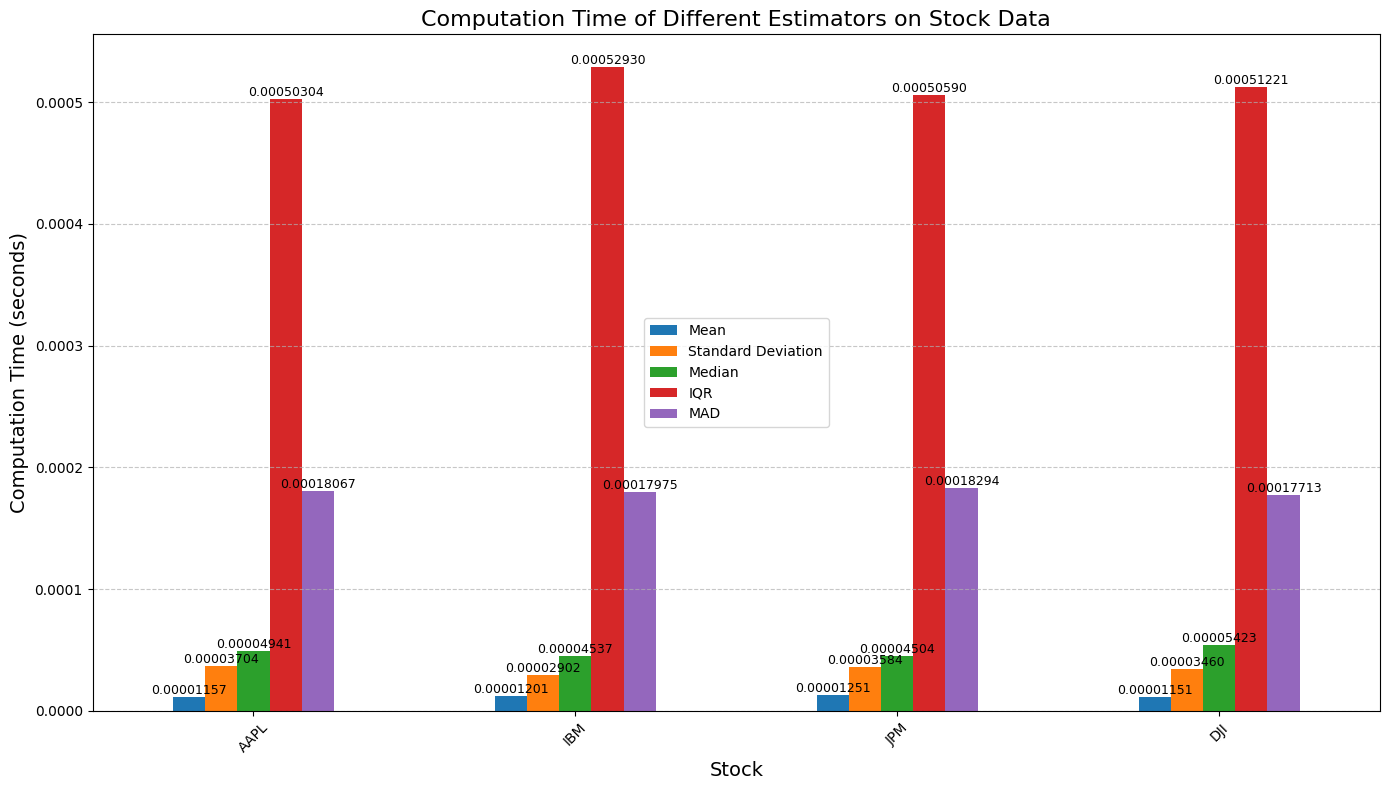

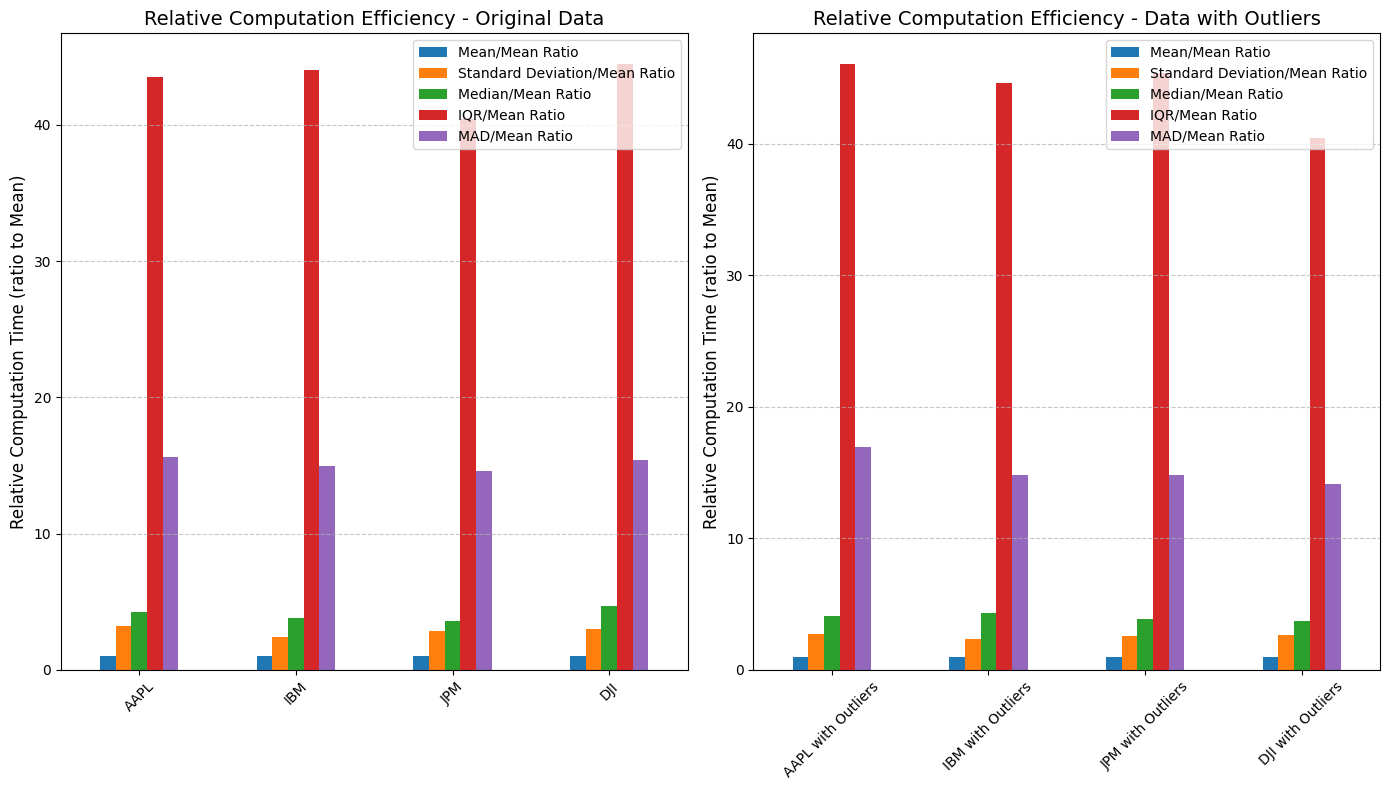

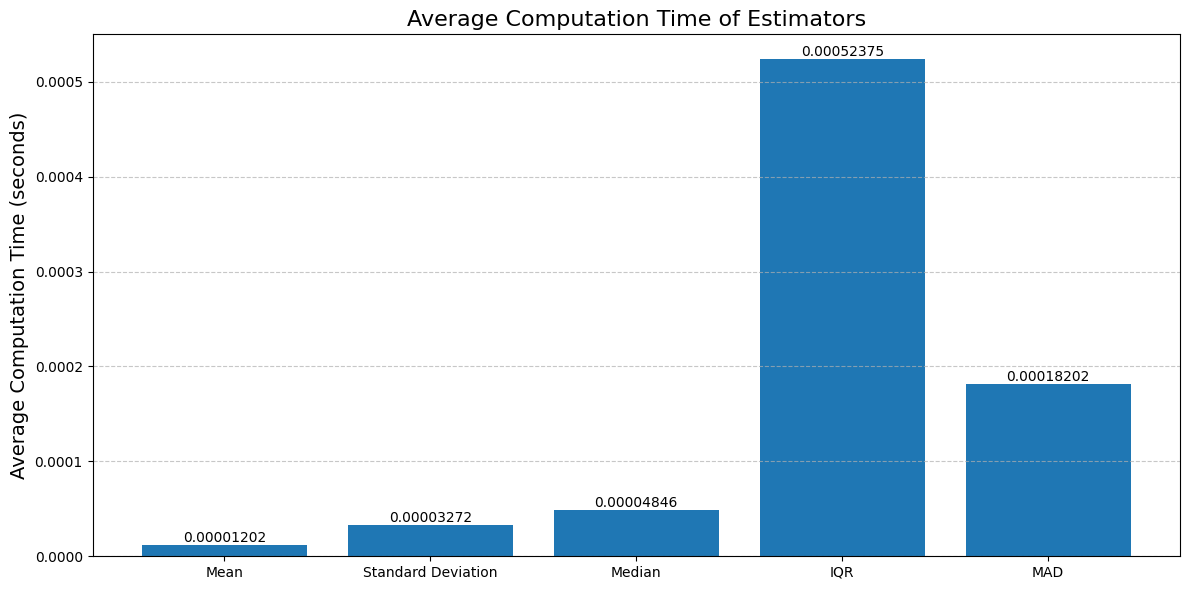

In [49]:
# Assessing the computational efficiency of different estimators on stock data
import time

# Define functions for different estimators
def calc_mean(data_series):
    """Calculate mean"""
    return data_series.mean()

def calc_std(data_series):
    """Calculate standard deviation"""
    return data_series.std()

def calc_median(data_series):
    """Calculate median"""
    return data_series.median()

def calc_iqr(data_series):
    """Calculate interquartile range (IQR)"""
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    return q3 - q1

def calc_mad(data_series):
    """Calculate median absolute deviation (MAD)"""
    median = data_series.median()
    abs_deviations = (data_series - median).abs()
    return abs_deviations.median()

# Measure performance of estimators on a given data series
def measure_performance(data_series, n_runs=1000):
    """
    Measure the performance of different estimators on a given data series
    
    Parameters:
    -----------
    data_series : pandas.Series
        Input data series
    n_runs : int
        Number of runs for each estimator to get reliable timing
        
    Returns:
    --------
    dict
        Dictionary with timing results for each estimator
    """
    estimators = {
        'Mean': calc_mean,
        'Standard Deviation': calc_std,
        'Median': calc_median,
        'IQR': calc_iqr,
        'MAD': calc_mad
    }
    
    results = {}
    
    for name, func in estimators.items():
        # Run multiple times for reliable timing
        start_time = time.time()
        for _ in range(n_runs):
            func(data_series)
        elapsed_time = (time.time() - start_time) / n_runs
        results[name] = elapsed_time
    
    return results

# Main function: Compare estimator efficiency on stock data
def compare_estimator_efficiency():
    """Compare the computational efficiency of different estimators on stock data"""
    
    # Use existing stock data
    stock_data = {
        'AAPL': aapl['Adj Close'],
        'IBM': ibm['Adj Close'],
        'JPM': jpm['Adj Close'],
        'DJI': dji['Adj Close']
    }
    
    # Use data with outliers for comparison
    stock_data_with_outliers = {
        'AAPL with Outliers': aapl_outlier['Adj Close'],
        'IBM with Outliers': ibm_outlier['Adj Close'],
        'JPM with Outliers': jpm_outlier['Adj Close'],
        'DJI with Outliers': dji_outlier['Adj Close']
    }
    
    # Combine all datasets
    all_datasets = {**stock_data, **stock_data_with_outliers}
    
    # Calculate performance for each dataset
    all_results = {}
    for name, data in all_datasets.items():
        print(f"Measuring performance on {name} dataset...")
        all_results[name] = measure_performance(data)
        
    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results).T
    
    # Calculate efficiency ratios relative to mean
    relative_df = pd.DataFrame(index=results_df.index)
    for col in results_df.columns:
        relative_df[f'{col}/Mean Ratio'] = results_df[col] / results_df['Mean']
    
    # Print results
    print("\nAbsolute computation times (seconds per call):")
    print(results_df)
    
    print("\nRelative computation times (ratio to Mean):")
    print(relative_df)
    
    # Create bar chart for original data computation times
    plt.figure(figsize=(14, 8))
    
    original_results = results_df.loc[list(stock_data.keys())]
    
    ax = original_results.plot(kind='bar', figsize=(14, 8))
    plt.title('Computation Time of Different Estimators on Stock Data', fontsize=16)
    plt.ylabel('Computation Time (seconds)', fontsize=14)
    plt.xlabel('Stock', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels to bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.8f', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('stock_estimator_efficiency.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Compare efficiency between original and outlier data
    plt.figure(figsize=(14, 8))
    
    # Subplot 1: Original data
    plt.subplot(1, 2, 1)
    original_relative = relative_df.loc[list(stock_data.keys())]
    ax1 = original_relative.plot(kind='bar', figsize=(7, 8), ax=plt.gca())
    plt.title('Relative Computation Efficiency - Original Data', fontsize=14)
    plt.ylabel('Relative Computation Time (ratio to Mean)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Subplot 2: Data with outliers
    plt.subplot(1, 2, 2)
    outlier_relative = relative_df.loc[list(stock_data_with_outliers.keys())]
    ax2 = outlier_relative.plot(kind='bar', figsize=(14, 8), ax=plt.gca())
    plt.title('Relative Computation Efficiency - Data with Outliers', fontsize=14)
    plt.ylabel('Relative Computation Time (ratio to Mean)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('relative_efficiency_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create bar chart for average efficiency of different functions
    function_avg = results_df.mean()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(function_avg.index, function_avg.values)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.8f}',
                 ha='center', va='bottom', rotation=0)
    
    plt.title('Average Computation Time of Estimators', fontsize=16)
    plt.ylabel('Average Computation Time (seconds)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('average_estimator_efficiency.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return results_df, relative_df

# Run the efficiency comparison test
computation_times, relative_efficiency = compare_estimator_efficiency()

### **Comparison of Computational Efficiency**  

From the computational efficiency comparison, **the mean (Mean) is the fastest estimator**, making it suitable for real-time data analysis. The **standard deviation (STD) is slightly slower but still maintains high efficiency**. In contrast, the **median (Median) and MAD (Median Absolute Deviation) have higher computational costs** but offer greater robustness in handling outliers.  

Among the estimators, **IQR (Interquartile Range) has the longest computation time, approximately 40-45 times that of the mean**. While it provides a more precise description of data distribution, its high computational cost makes it impractical for large-scale real-time calculations.  

Under the influence of outliers, the computation time for each estimator remains relatively stable, indicating that **outliers do not significantly impact computational efficiency**.  

### **Based on the analysis of the graphs:**  
- If **computational speed is the priority**, the **mean (Mean) or standard deviation (STD) are recommended**.  
- If a **more robust estimator is required**, **MAD is a better choice**.  
- **IQR is more suitable for detailed offline analysis** due to its higher computational cost.  


3. Assess and compare the breakdown points associated with the different estimators.

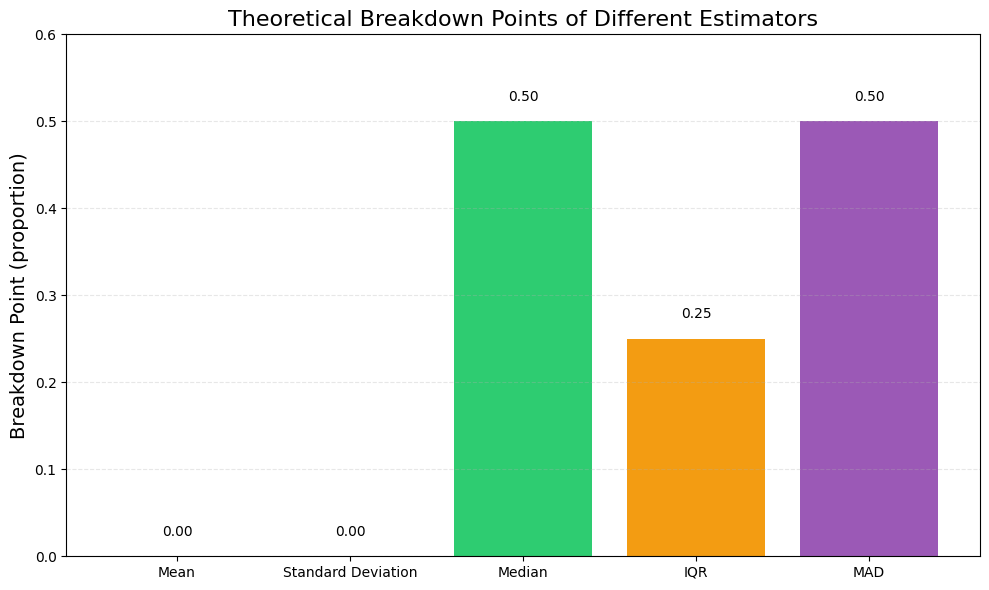

Running breakdown point simulation for AAPL...
Running breakdown point simulation for IBM...
Running breakdown point simulation for JPM...
Running breakdown point simulation for DJI...


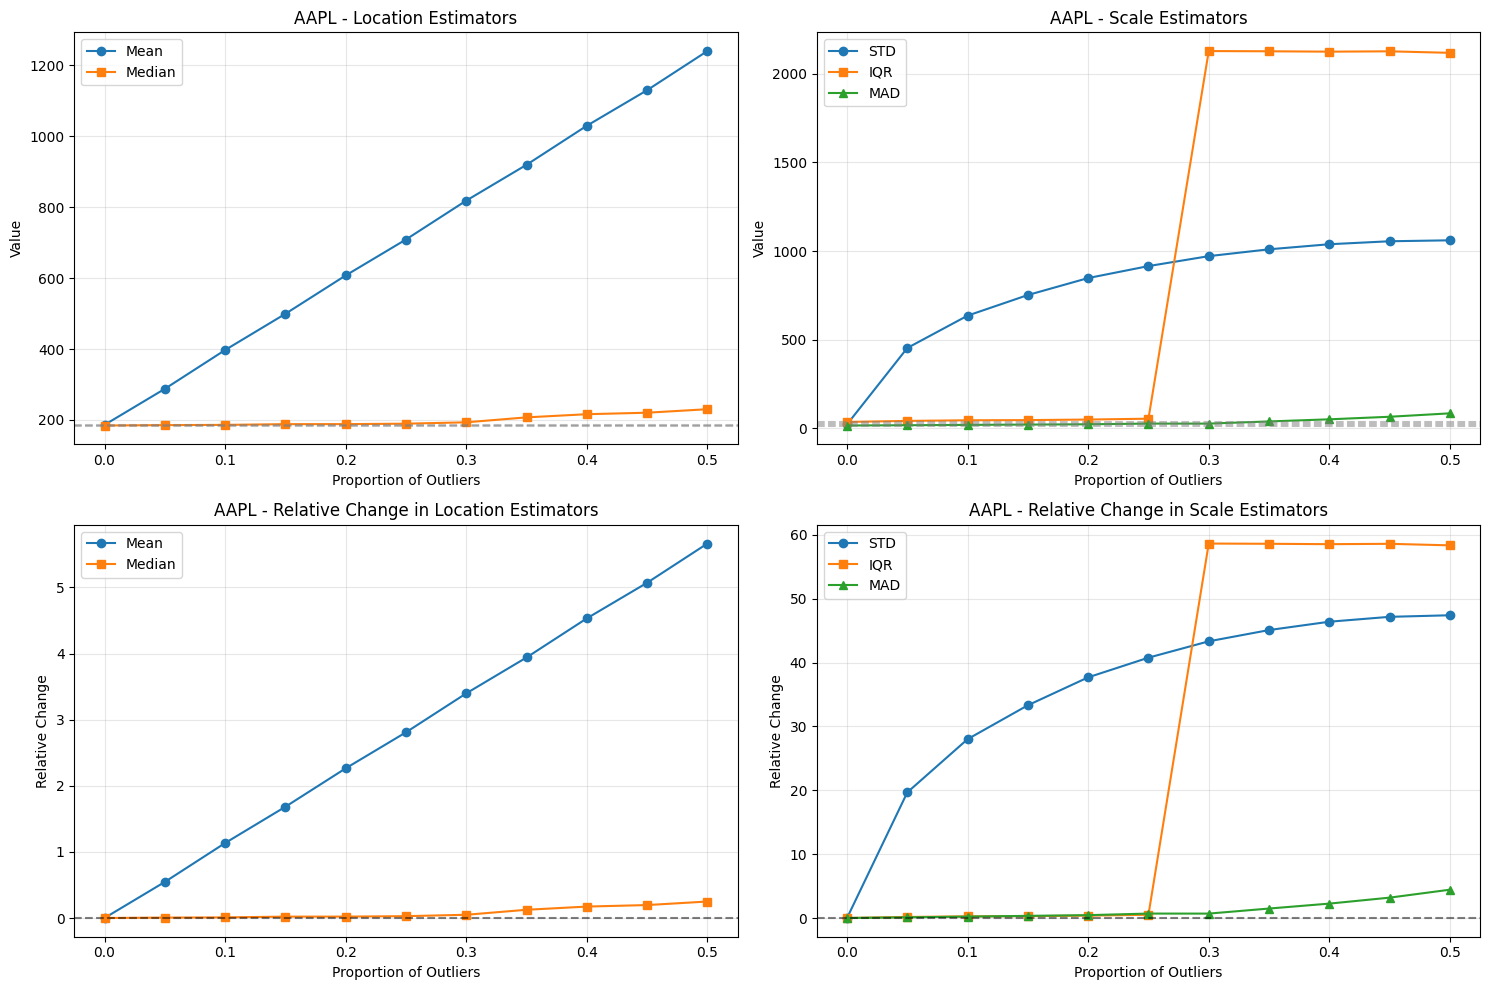

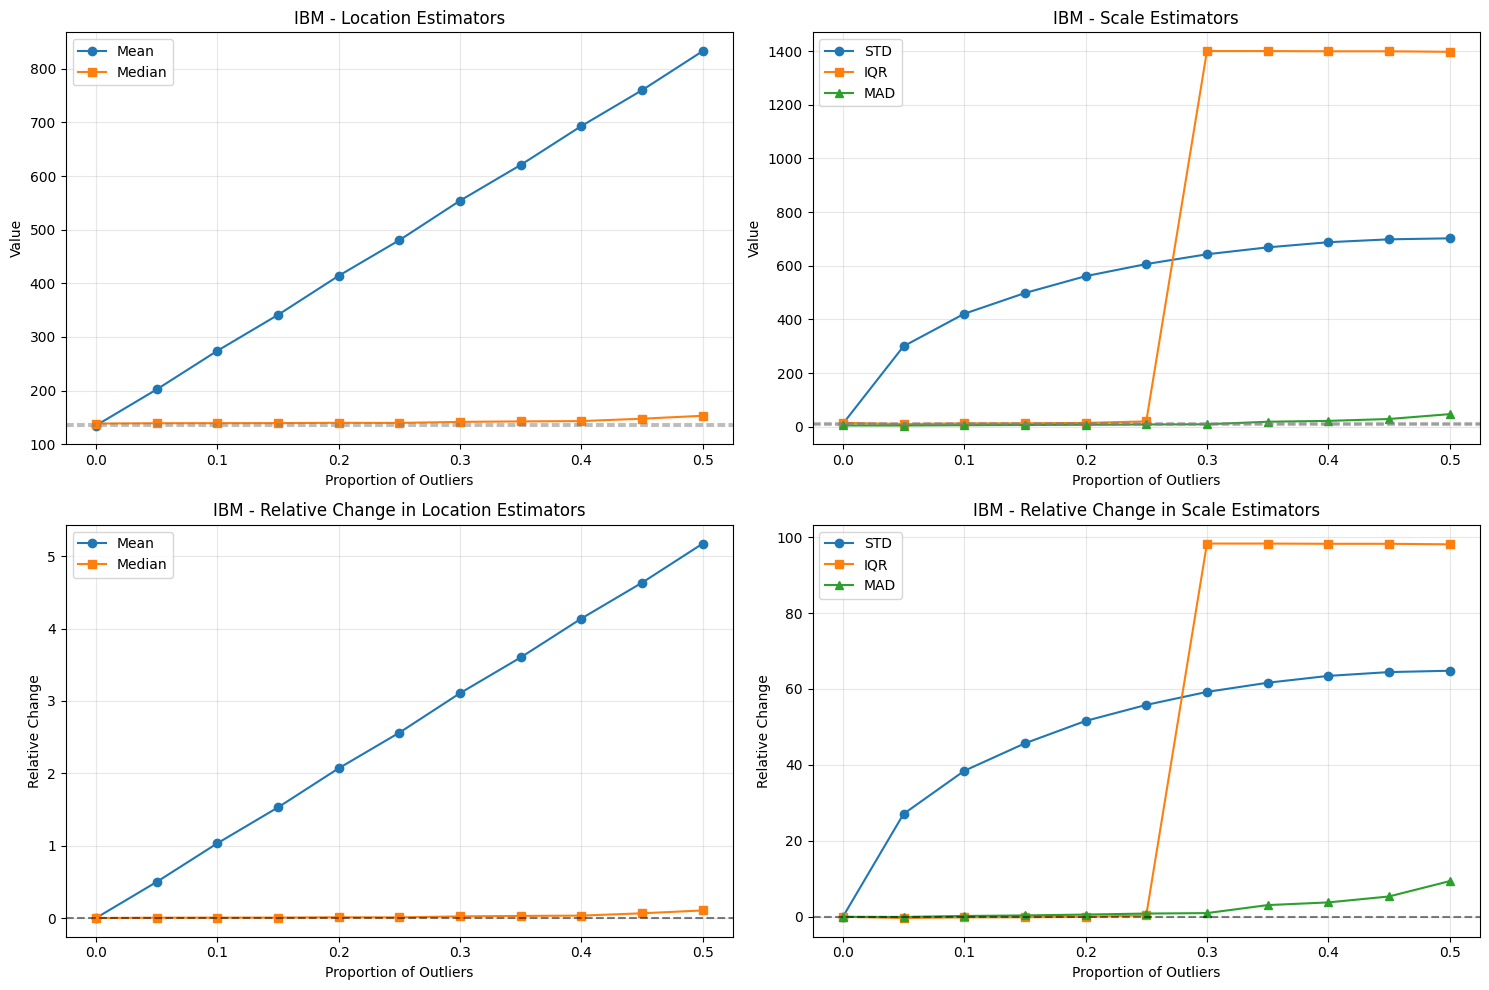

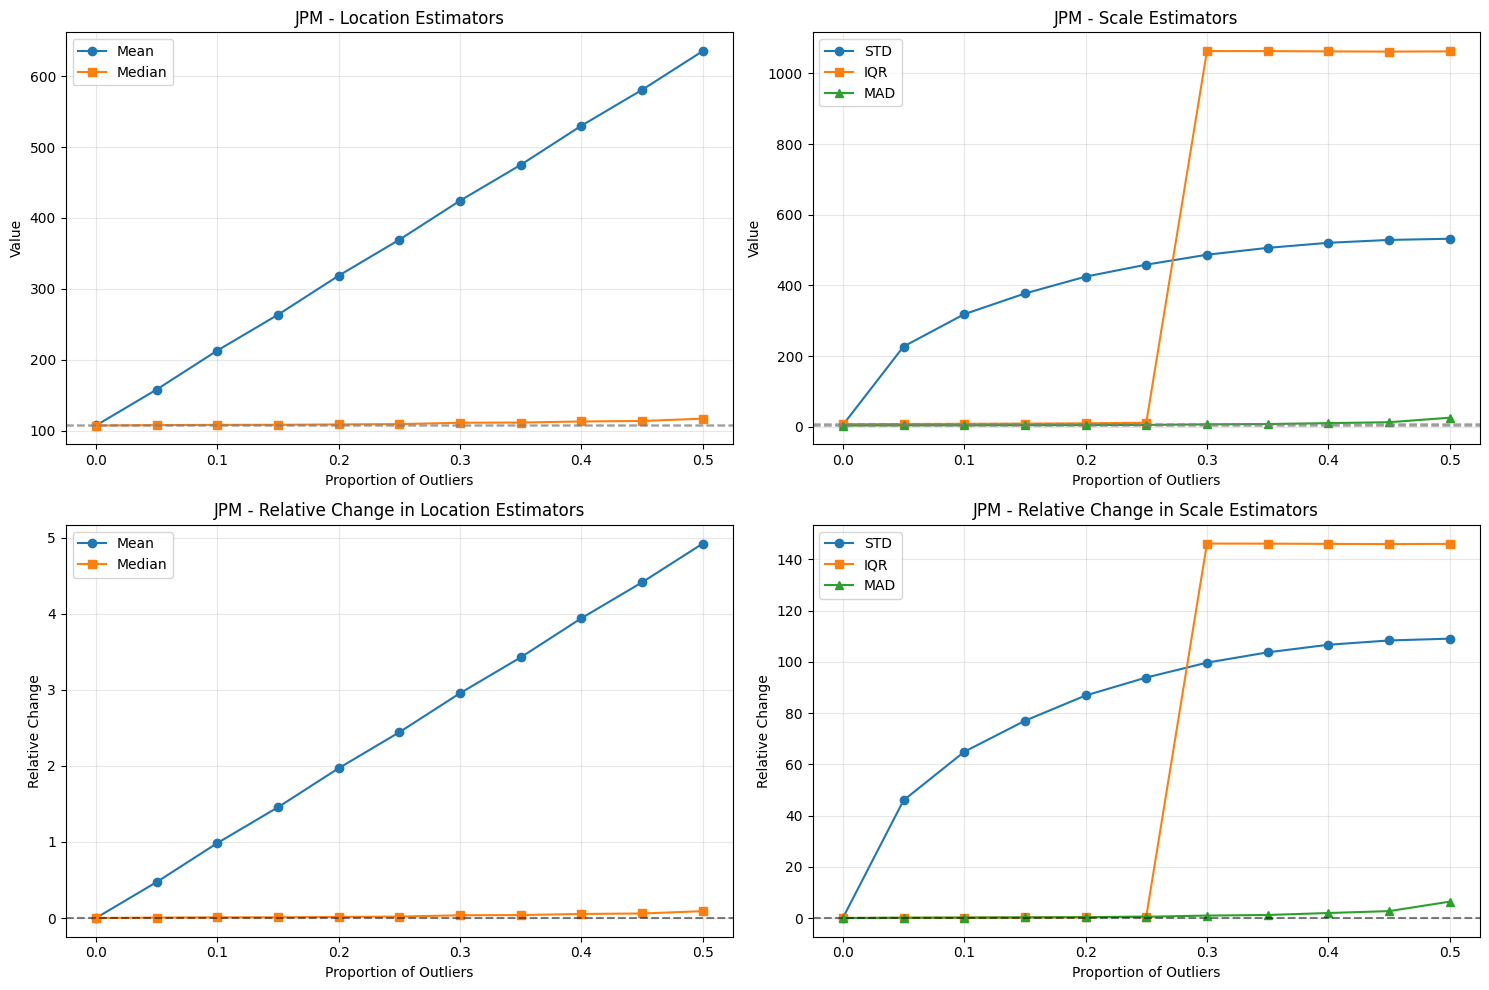

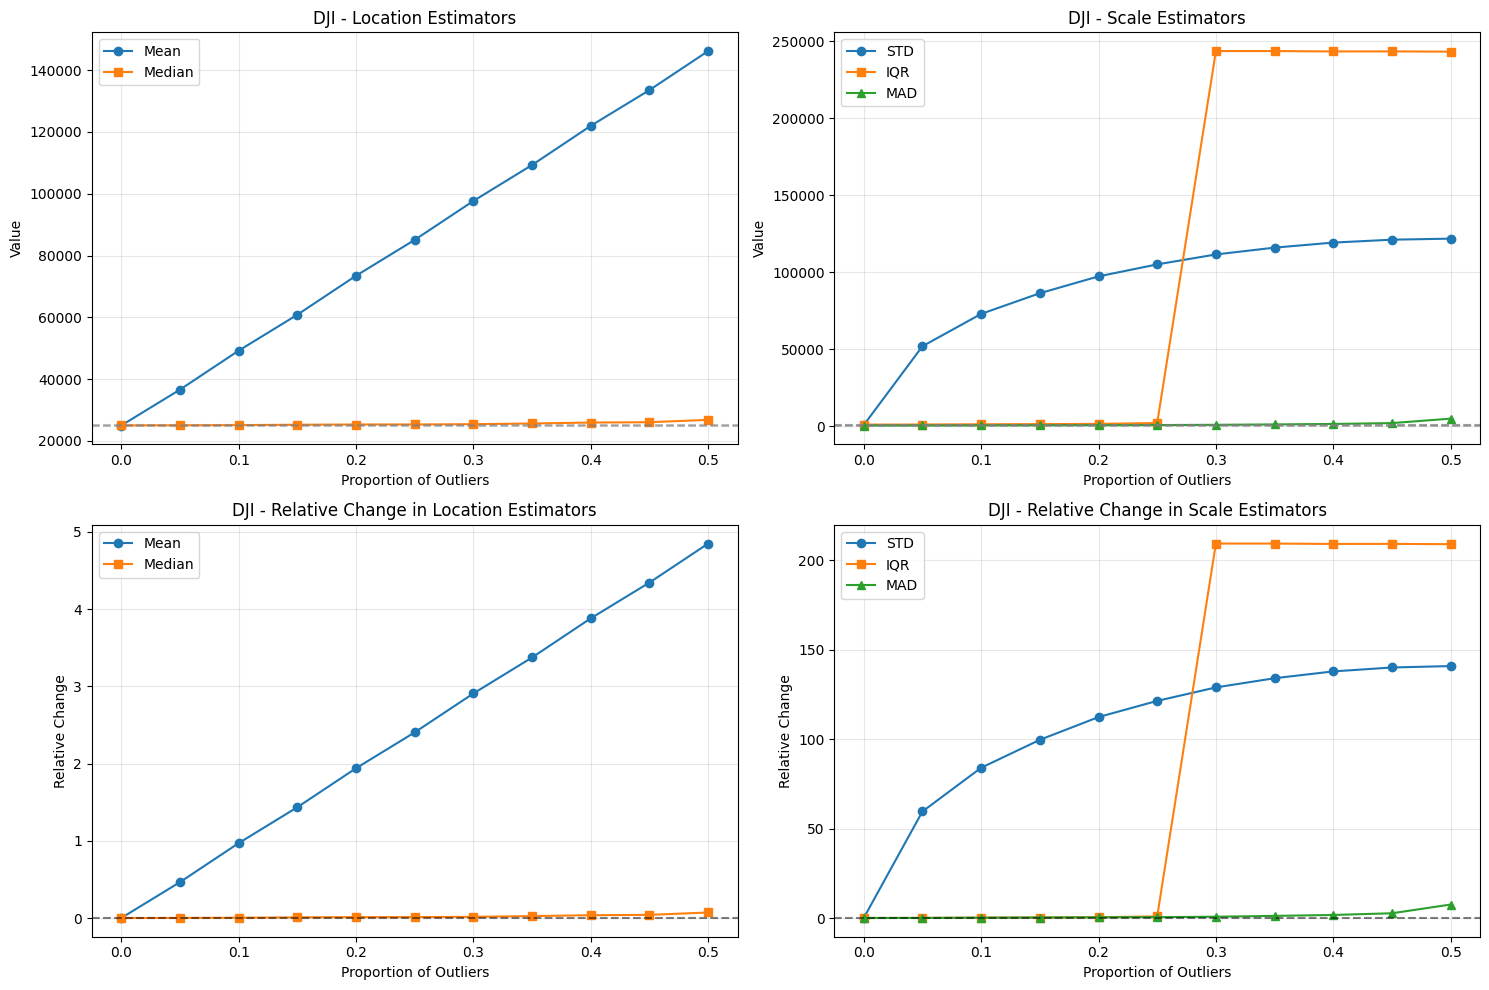


Empirical Breakdown Points (proportion of outliers causing >50% change):
      Mean Median   STD   IQR   MAD
AAPL  0.05   >0.5  0.05  0.25  0.25
IBM    0.1   >0.5  0.05   0.3   0.2
JPM    0.1   >0.5  0.05  0.25   0.3
DJI    0.1   >0.5  0.05  0.25   0.3


In [51]:
# Assessing and comparing breakdown points of different estimators

# Define functions for different estimators
def calc_mean(data_series):
    """Calculate mean"""
    return data_series.mean()

def calc_std(data_series):
    """Calculate standard deviation"""
    return data_series.std()

def calc_median(data_series):
    """Calculate median"""
    return data_series.median()

def calc_iqr(data_series):
    """Calculate interquartile range (IQR)"""
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    return q3 - q1

def calc_mad(data_series):
    """Calculate median absolute deviation (MAD)"""
    median = data_series.median()
    abs_deviations = (data_series - median).abs()
    return abs_deviations.median()

# Function to illustrate the breakdown point by introducing increasing proportions of outliers
def breakdown_point_simulation(data_series, outlier_proportions, outlier_value_factor=10):
    """
    Simulate the breakdown point by introducing increasing proportions of outliers
    
    Parameters:
    -----------
    data_series : pandas.Series
        Original data series
    outlier_proportions : list
        List of proportions of outliers to introduce (0 to 1)
    outlier_value_factor : float
        Factor to multiply the maximum value to create outliers
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with estimator values for each outlier proportion
    """
    # Create a copy of the original data
    original_data = data_series.copy()
    
    # Maximum value to use for creating outliers
    max_value = original_data.max() * outlier_value_factor
    
    # Dictionary to store results
    results = {
        'Proportion': outlier_proportions,
        'Mean': [],
        'Median': [],
        'Standard Deviation': [],
        'IQR': [],
        'MAD': []
    }
    
    # Original values without outliers
    original_mean = calc_mean(original_data)
    original_median = calc_median(original_data)
    original_std = calc_std(original_data)
    original_iqr = calc_iqr(original_data)
    original_mad = calc_mad(original_data)
    
    # For each proportion, introduce outliers and calculate estimators
    for prop in outlier_proportions:
        # Create a copy of the data for this simulation
        data = original_data.copy()
        
        # Number of outliers to introduce
        n_outliers = int(prop * len(data))
        
        if n_outliers > 0:
            # Randomly select indices for outliers
            outlier_indices = np.random.choice(data.index, size=n_outliers, replace=False)
            
            # Set outlier values
            data[outlier_indices] = max_value
        
        # Calculate estimators
        results['Mean'].append(calc_mean(data))
        results['Median'].append(calc_median(data))
        results['Standard Deviation'].append(calc_std(data))
        results['IQR'].append(calc_iqr(data))
        results['MAD'].append(calc_mad(data))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Calculate relative change from original values
    results_df['Mean_rel'] = results_df['Mean'] / original_mean - 1
    results_df['Median_rel'] = results_df['Median'] / original_median - 1
    results_df['STD_rel'] = results_df['Standard Deviation'] / original_std - 1
    results_df['IQR_rel'] = results_df['IQR'] / original_iqr - 1
    results_df['MAD_rel'] = results_df['MAD'] / original_mad - 1
    
    return results_df

# Run the simulation with different proportions of outliers
def compare_breakdown_points(stock_data):
    """
    Compare breakdown points for different estimators on stock data
    
    Parameters:
    -----------
    stock_data : dict
        Dictionary of stock data series
        
    Returns:
    --------
    dict
        Dictionary of simulation results for each stock
    """
    # Define proportions of outliers to test
    outlier_proportions = np.linspace(0, 0.5, 11)  # 0% to 50% in 5% steps
    
    # Dictionary to store results
    results = {}
    
    for name, data in stock_data.items():
        print(f"Running breakdown point simulation for {name}...")
        results[name] = breakdown_point_simulation(data, outlier_proportions)
    
    return results

# Visualize the breakdown point simulation results
def plot_breakdown_simulation(simulation_results, stock_name):
    """
    Plot the results of the breakdown point simulation
    
    Parameters:
    -----------
    simulation_results : pandas.DataFrame
        Results from breakdown_point_simulation
    stock_name : str
        Name of the stock for the title
    """
    # Plot the absolute values
    plt.figure(figsize=(15, 10))
    
    # Location estimators
    plt.subplot(2, 2, 1)
    plt.plot(simulation_results['Proportion'], simulation_results['Mean'], 
             marker='o', label='Mean')
    plt.plot(simulation_results['Proportion'], simulation_results['Median'], 
             marker='s', label='Median')
    plt.axhline(y=simulation_results['Mean'].iloc[0], linestyle='--', color='gray', alpha=0.5)
    plt.axhline(y=simulation_results['Median'].iloc[0], linestyle='--', color='gray', alpha=0.5)
    plt.title(f'{stock_name} - Location Estimators')
    plt.xlabel('Proportion of Outliers')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Scale estimators
    plt.subplot(2, 2, 2)
    plt.plot(simulation_results['Proportion'], simulation_results['Standard Deviation'], 
             marker='o', label='STD')
    plt.plot(simulation_results['Proportion'], simulation_results['IQR'], 
             marker='s', label='IQR')
    plt.plot(simulation_results['Proportion'], simulation_results['MAD'], 
             marker='^', label='MAD')
    plt.axhline(y=simulation_results['Standard Deviation'].iloc[0], linestyle='--', color='gray', alpha=0.5)
    plt.axhline(y=simulation_results['IQR'].iloc[0], linestyle='--', color='gray', alpha=0.5)
    plt.axhline(y=simulation_results['MAD'].iloc[0], linestyle='--', color='gray', alpha=0.5)
    plt.title(f'{stock_name} - Scale Estimators')
    plt.xlabel('Proportion of Outliers')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Relative change for location estimators
    plt.subplot(2, 2, 3)
    plt.plot(simulation_results['Proportion'], simulation_results['Mean_rel'], 
             marker='o', label='Mean')
    plt.plot(simulation_results['Proportion'], simulation_results['Median_rel'], 
             marker='s', label='Median')
    plt.axhline(y=0, linestyle='--', color='black', alpha=0.5)
    plt.title(f'{stock_name} - Relative Change in Location Estimators')
    plt.xlabel('Proportion of Outliers')
    plt.ylabel('Relative Change')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Relative change for scale estimators
    plt.subplot(2, 2, 4)
    plt.plot(simulation_results['Proportion'], simulation_results['STD_rel'], 
             marker='o', label='STD')
    plt.plot(simulation_results['Proportion'], simulation_results['IQR_rel'], 
             marker='s', label='IQR')
    plt.plot(simulation_results['Proportion'], simulation_results['MAD_rel'], 
             marker='^', label='MAD')
    plt.axhline(y=0, linestyle='--', color='black', alpha=0.5)
    plt.title(f'{stock_name} - Relative Change in Scale Estimators')
    plt.xlabel('Proportion of Outliers')
    plt.ylabel('Relative Change')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{stock_name}_breakdown_simulation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot breakdown point theoretical limits
def plot_theoretical_breakdown_points():
    """
    Plot the theoretical breakdown points of different estimators
    """
    estimators = ['Mean', 'Standard Deviation', 'Median', 'IQR', 'MAD']
    breakdown_points = [0, 0, 0.5, 0.25, 0.5]
    
    plt.figure(figsize=(10, 6))
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
    
    bars = plt.bar(estimators, breakdown_points, color=colors)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    
    plt.title('Theoretical Breakdown Points of Different Estimators', fontsize=16)
    plt.ylabel('Breakdown Point (proportion)', fontsize=14)
    plt.ylim(0, 0.6)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('theoretical_breakdown_points.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main function to run all breakdown point analyses
def analyze_breakdown_points():
    """
    Analyze breakdown points for different estimators on stock data
    """
    # Prepare stock data
    stock_data = {
        'AAPL': aapl['Adj Close'],
        'IBM': ibm['Adj Close'],
        'JPM': jpm['Adj Close'],
        'DJI': dji['Adj Close']
    }
    
    # Generate theoretical breakdown point chart
    plot_theoretical_breakdown_points()
    
    # Run simulations for each stock
    simulation_results = compare_breakdown_points(stock_data)
    
    plot_breakdown_simulation(simulation_results['AAPL'], 'AAPL')
    plot_breakdown_simulation(simulation_results['IBM'], 'IBM')
    plot_breakdown_simulation(simulation_results['JPM'], 'JPM')
    plot_breakdown_simulation(simulation_results['DJI'], 'DJI')

    # Calculate empirical breakdown points (point where relative change exceeds 50%)
    empirical_bps = pd.DataFrame(index=stock_data.keys(), 
                                 columns=['Mean', 'Median', 'STD', 'IQR', 'MAD'])
    
    for stock_name, results in simulation_results.items():

        for est, rel_col in [('Mean', 'Mean_rel'), ('Median', 'Median_rel'), 
                             ('STD', 'STD_rel'), ('IQR', 'IQR_rel'), ('MAD', 'MAD_rel')]:
            # Find the first point where relative change exceeds 50%
            exceed_idx = (results[rel_col].abs() > 0.5).idxmax()
            if exceed_idx == 0 and results[rel_col].abs().iloc[0] <= 0.5:
                # No breakdown within tested range
                empirical_bps.loc[stock_name, est] = '>0.5'
            else:
                empirical_bps.loc[stock_name, est] = results['Proportion'].iloc[exceed_idx]
    
    print("\nEmpirical Breakdown Points (proportion of outliers causing >50% change):")
    print(empirical_bps)
    
    return simulation_results, empirical_bps

# Run the analysis
sim_results, empirical_breakdown_points = analyze_breakdown_points()

From the charts and data, the **breakdown points** of different estimators vary significantly, reflecting their sensitivity to outliers. **Mean (Mean) and Standard Deviation (STD)** have **a breakdown point close to 0**, meaning that **even with just 5%-10% of outliers, their values shift significantly**, demonstrating extremely poor robustness. In contrast, **Median (Median) and MAD (Median Absolute Deviation)** have a **breakdown point of 50%**, meaning that **even if half of the dataset consists of outliers, they remain stable**, making them highly resistant to anomalies. **Interquartile Range (IQR)** has a **breakdown point of approximately 25%-30%**, positioning it between standard deviation and MAD. While it can resist a certain level of outliers, its reliability starts to deteriorate when the proportion of anomalies exceeds 30%. Based on empirical data from **AAPL, IBM, JPM, and DJI**, **Mean and STD exhibit the lowest breakdown points, becoming entirely unreliable with just 5%-10% of outliers, whereas MAD and Median remain stable, even when over 50% of the data are anomalies**. Overall, **Mean and STD perform poorly under extreme financial market fluctuations, whereas Median and MAD are much more robust estimators. IQR is suitable for datasets with up to 25% outliers but may break down in extreme cases**. For datasets with a high proportion of anomalies, **Median and MAD are recommended, while Mean and STD should be avoided for statistical analysis**.

## 4.3 Robust and OLS Regression

1. Regress each stock’s 1-day returns against the 1-day returns of DJI using Ordinary Least Squares (OLS) regression.

OLS Regression Results for AAPL against DJI:
Alpha (Intercept): 0.000165
Beta (Slope): 1.325580
R-squared: 0.516518
Adjusted R-squared: 0.514568
P-value (F-statistic): 5.120637e-41
Standard Error: 0.081438



e:\anaconda3\envs\e-commerce\lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


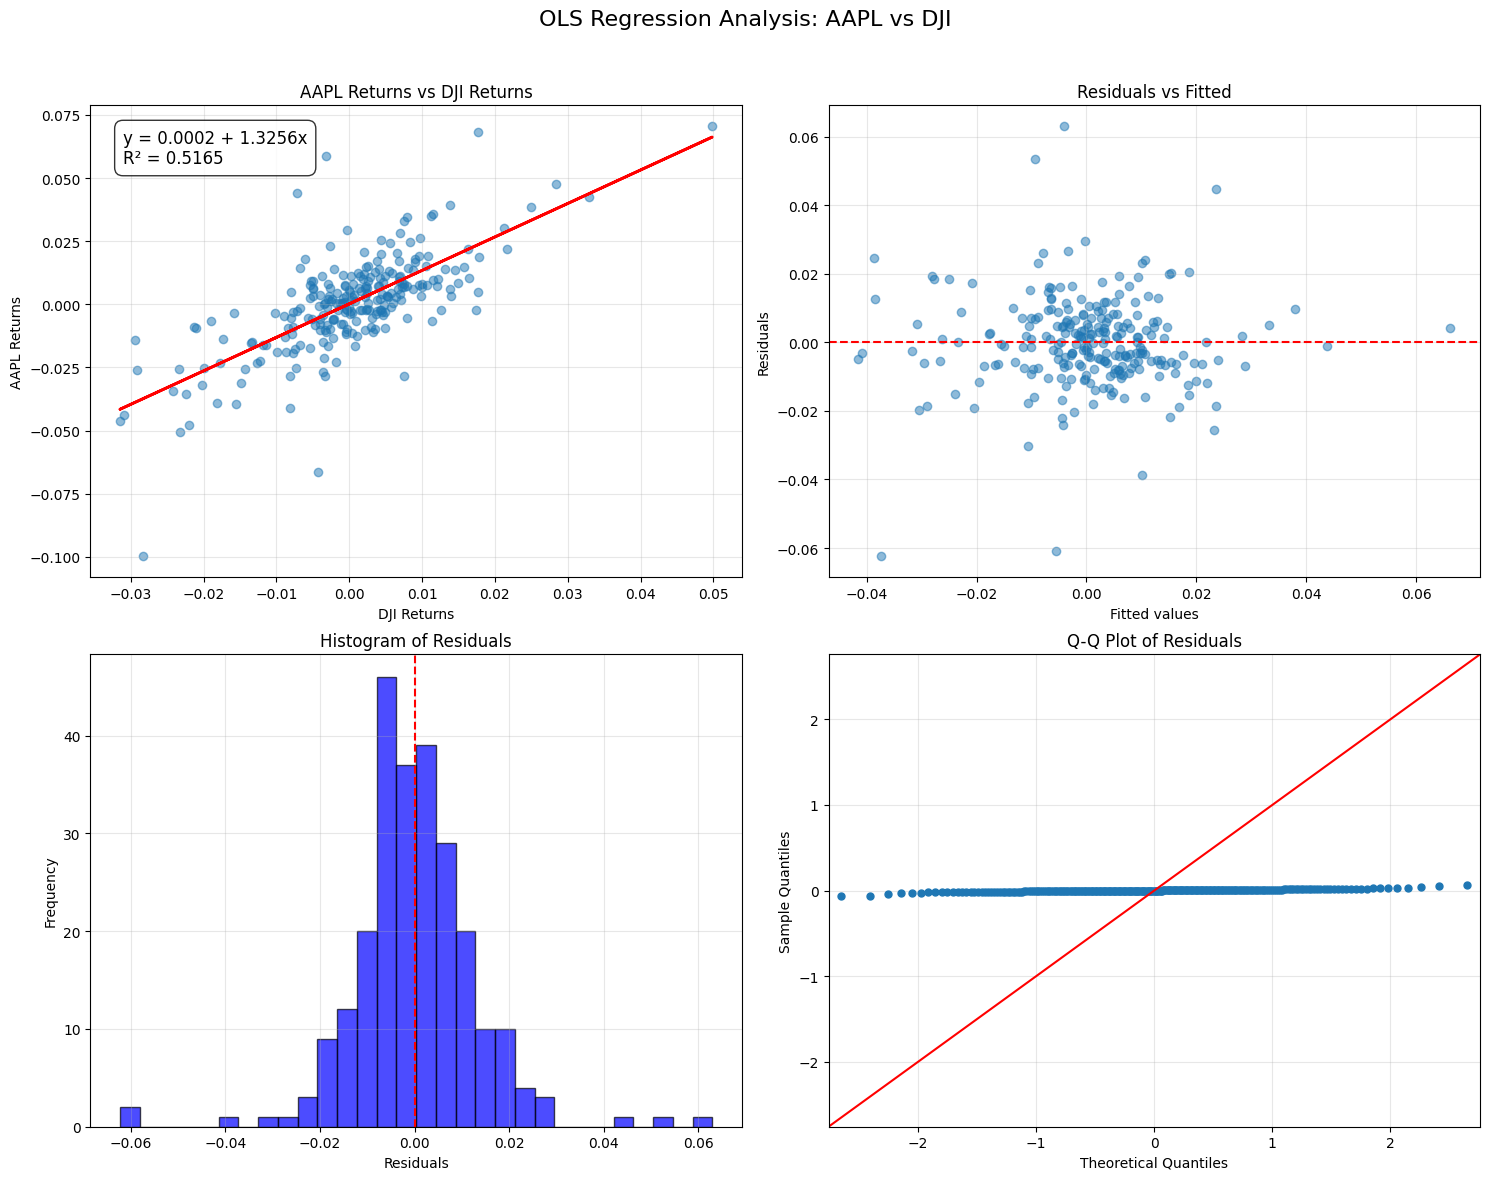

OLS Regression Results for IBM against DJI:
Alpha (Intercept): -0.000441
Beta (Slope): 0.960092
R-squared: 0.417773
Adjusted R-squared: 0.415425
P-value (F-statistic): 5.793026e-31
Standard Error: 0.071972



e:\anaconda3\envs\e-commerce\lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


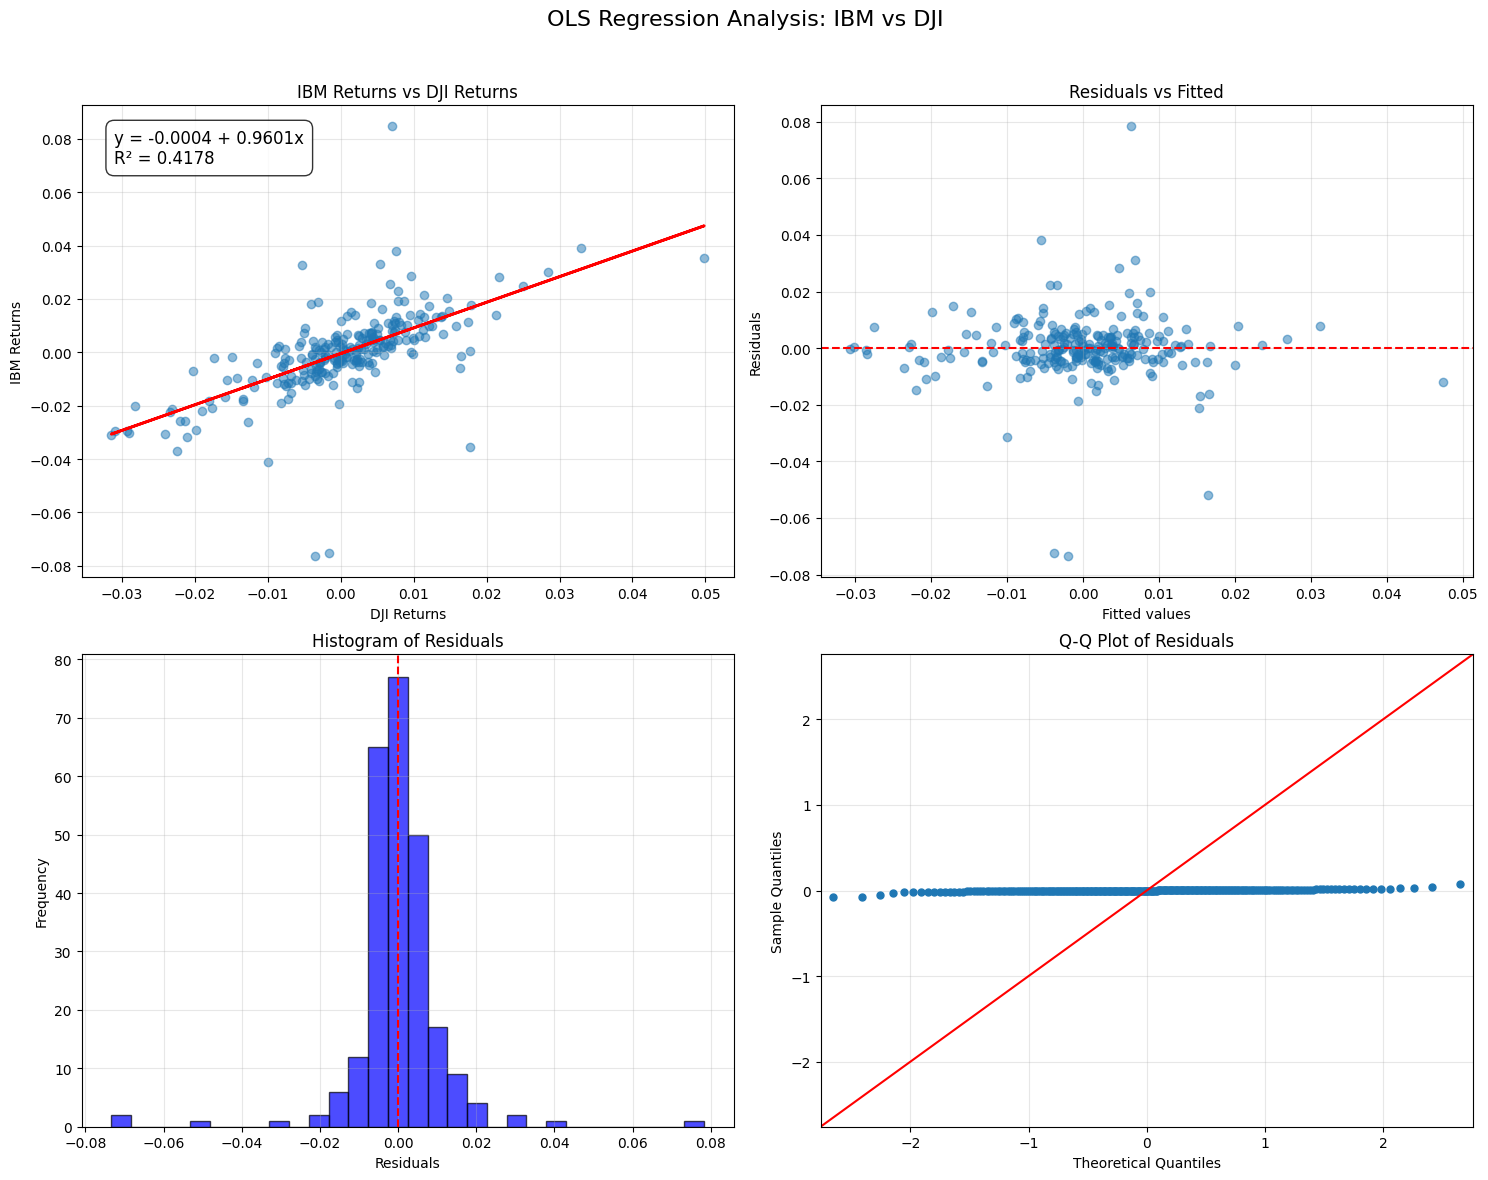

OLS Regression Results for JPM against DJI:
Alpha (Intercept): -0.000316
Beta (Slope): 0.931408
R-squared: 0.555864
Adjusted R-squared: 0.554073
P-value (F-statistic): 1.325607e-45
Standard Error: 0.052867



e:\anaconda3\envs\e-commerce\lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


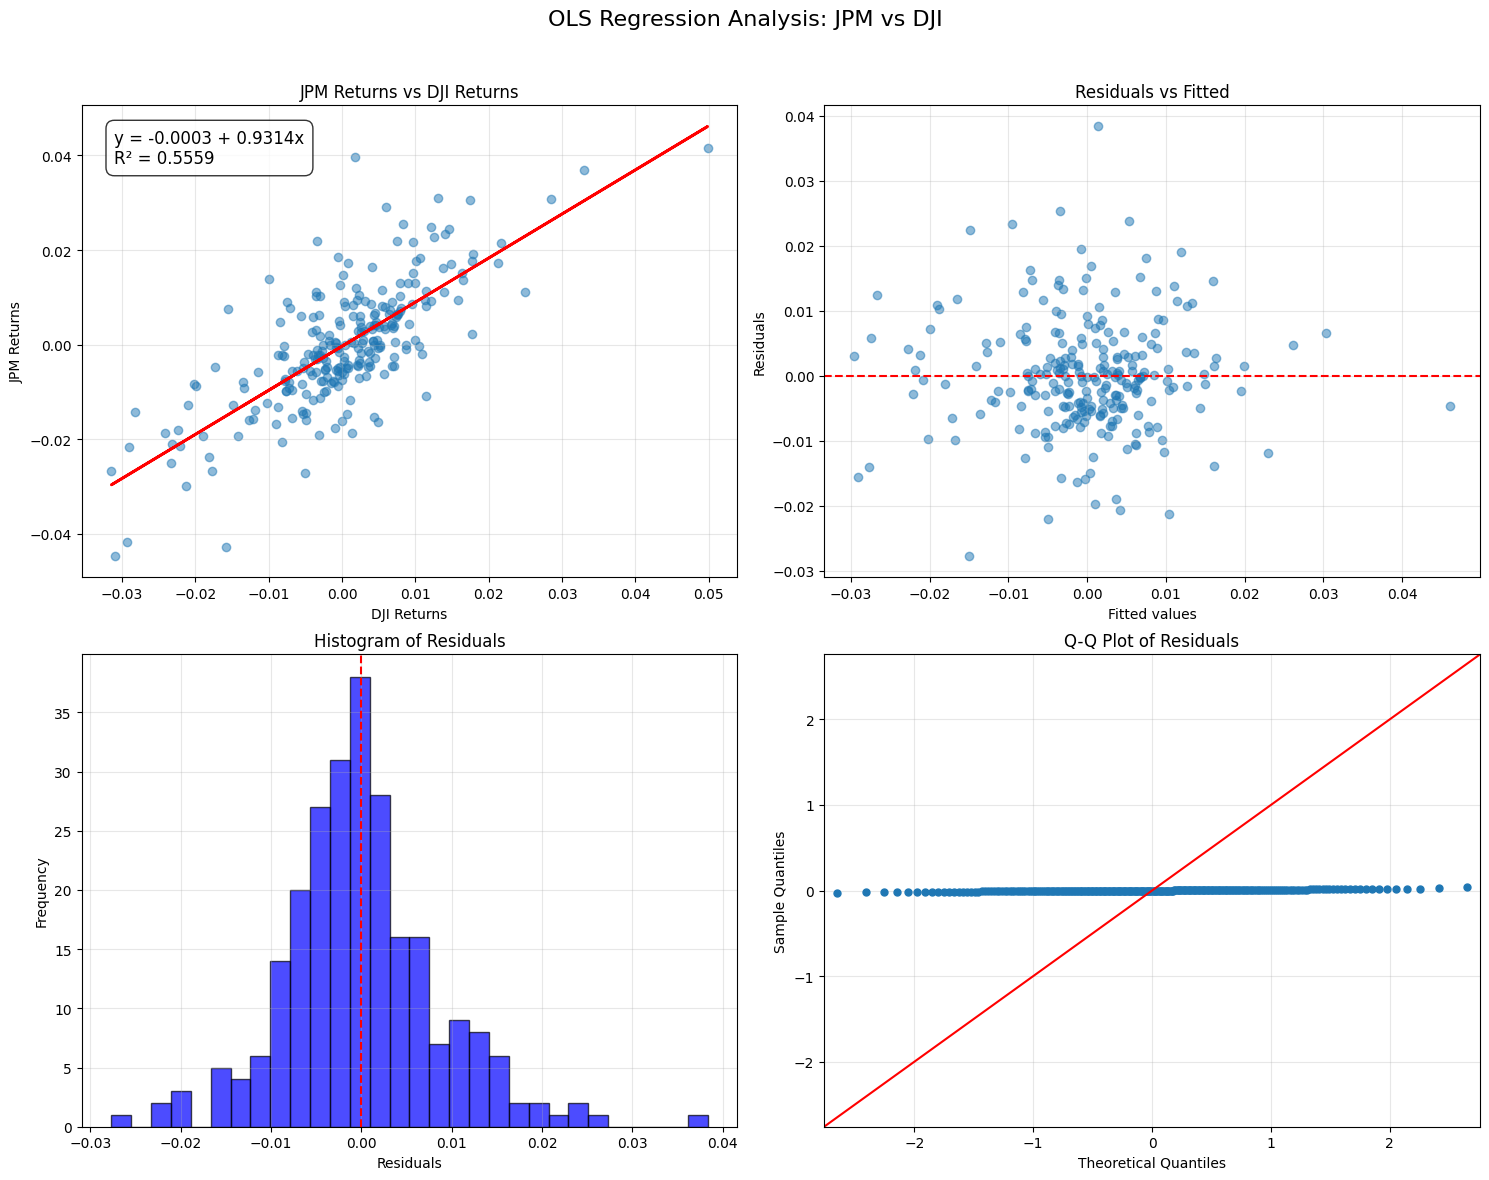

Comparison of OLS Regression Results:
        Alpha    Beta  R-squared  Std Error
Stock                                      
AAPL   0.0002  1.3256     0.5165     0.0814
IBM   -0.0004  0.9601     0.4178     0.0720
JPM   -0.0003  0.9314     0.5559     0.0529


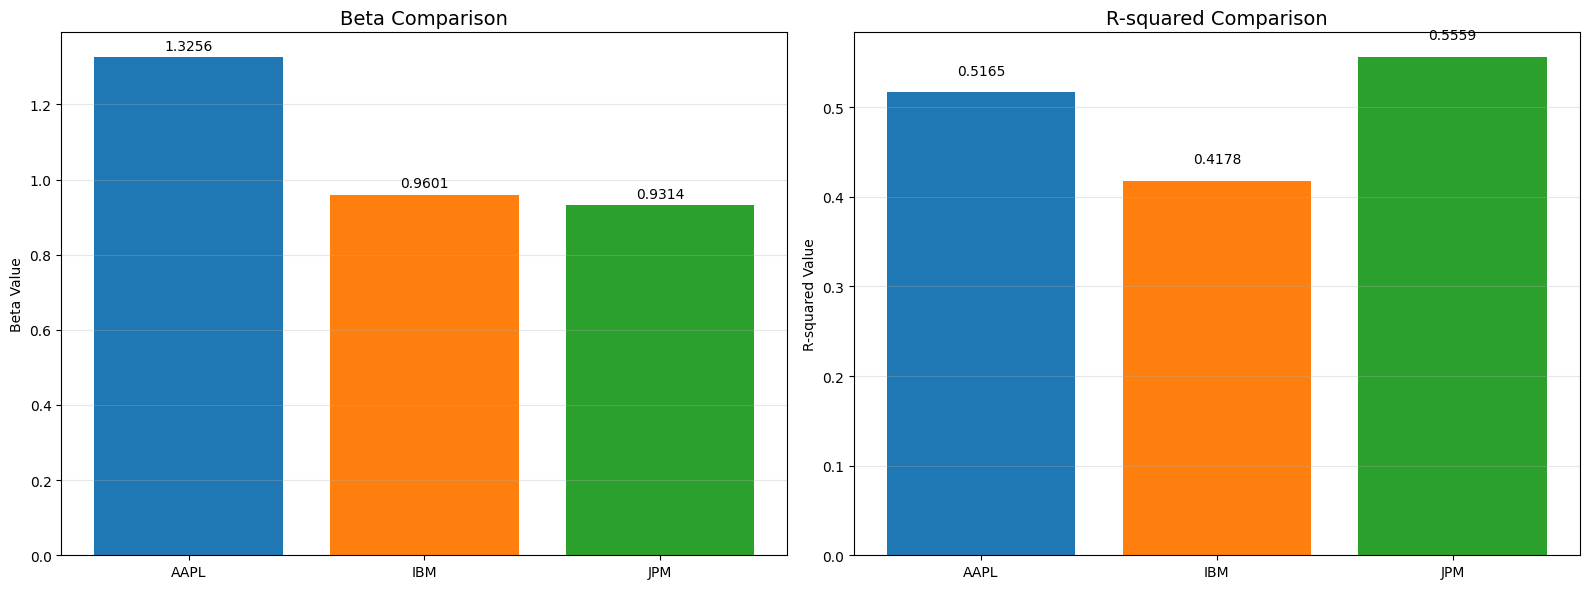

In [54]:
# Regressing 1-day returns of individual stocks against DJI using OLS
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

# Calculate 1-day returns for all stocks if not already done
def calculate_returns(data):
    """Calculate 1-day returns for the given data"""
    return data['Adj Close'].pct_change().dropna()

# Calculate 1-day returns
aapl_returns = calculate_returns(aapl)
ibm_returns = calculate_returns(ibm)
jpm_returns = calculate_returns(jpm)
dji_returns = calculate_returns(dji)

# Combine all returns into a single DataFrame for analysis
returns_df = pd.DataFrame({
    'AAPL': aapl_returns,
    'IBM': ibm_returns,
    'JPM': jpm_returns,
    'DJI': dji_returns
}).dropna()  # Remove any rows with NaN values

# Function to perform OLS regression and visualize results
def perform_ols_analysis(stock_name, returns_data):
    """
    Perform OLS regression analysis of stock returns against DJI returns
    
    Parameters:
    -----------
    stock_name : str
        Name of the stock
    returns_data : pandas.DataFrame
        DataFrame containing returns for the stock and DJI
        
    Returns:
    --------
    statsmodels.regression.linear_model.RegressionResults
        Results of the OLS regression
    """
    # Prepare X (DJI returns) and y (stock returns)
    X = returns_data['DJI']
    y = returns_data[stock_name]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # 获取参数名称 - 通常是'const'和'DJI'
    const_name = model.params.index[0]  # 通常是'const'
    dji_name = model.params.index[1]    # 通常是'DJI'
    
    alpha = model.params[const_name]
    beta = model.params[dji_name]
    beta_se = model.bse[dji_name]
    
    # Print regression summary
    print(f"OLS Regression Results for {stock_name} against DJI:")
    print("===============================================")
    print(f"Alpha (Intercept): {alpha:.6f}")
    print(f"Beta (Slope): {beta:.6f}")
    print(f"R-squared: {model.rsquared:.6f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.6f}")
    print(f"P-value (F-statistic): {model.f_pvalue:.6e}")
    print(f"Standard Error: {beta_se:.6f}")
    print("===============================================\n")
    
    # Prepare predictions and residuals for plotting
    predictions = model.predict(X)
    residuals = y - predictions
    
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'OLS Regression Analysis: {stock_name} vs DJI', fontsize=16)
    
    # Scatter plot with regression line
    axes[0, 0].scatter(X[dji_name], y, alpha=0.5)
    axes[0, 0].plot(X[dji_name], predictions, color='red', linewidth=2)
    axes[0, 0].set_title(f'{stock_name} Returns vs DJI Returns')
    axes[0, 0].set_xlabel('DJI Returns')
    axes[0, 0].set_ylabel(f'{stock_name} Returns')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add formula and R-squared to the plot
    formula = f"y = {alpha:.4f} + {beta:.4f}x"
    r2 = f"R² = {model.rsquared:.4f}"
    axes[0, 0].annotate(formula + "\n" + r2, 
                        xy=(0.05, 0.95), 
                        xycoords='axes fraction', 
                        fontsize=12,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    # Residuals vs Fitted values
    axes[0, 1].scatter(predictions, residuals, alpha=0.5)
    axes[0, 1].axhline(y=0, color='red', linestyle='--')
    axes[0, 1].set_title('Residuals vs Fitted')
    axes[0, 1].set_xlabel('Fitted values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Histogram of residuals
    axes[1, 0].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 0].axvline(x=0, color='red', linestyle='--')
    axes[1, 0].set_title('Histogram of Residuals')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q plot of residuals - 修复色彩冗余警告
    QQ = ProbPlot(residuals)
    # 不使用fmt参数，改为明确指定marker和color
    QQ.qqplot(line='45', ax=axes[1, 1], marker='o', color='skyblue', markersize=5)
    axes[1, 1].set_title('Q-Q Plot of Residuals')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(f'{stock_name}_vs_DJI_regression.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return model, alpha, beta, beta_se

# Perform OLS regression for each stock
aapl_model, aapl_alpha, aapl_beta, aapl_se = perform_ols_analysis('AAPL', returns_df)
ibm_model, ibm_alpha, ibm_beta, ibm_se = perform_ols_analysis('IBM', returns_df)
jpm_model, jpm_alpha, jpm_beta, jpm_se = perform_ols_analysis('JPM', returns_df)

# Compare betas and R-squared values across stocks
comparison_df = pd.DataFrame({
    'Stock': ['AAPL', 'IBM', 'JPM'],
    'Alpha': [aapl_alpha, ibm_alpha, jpm_alpha],
    'Beta': [aapl_beta, ibm_beta, jpm_beta],
    'R-squared': [aapl_model.rsquared, ibm_model.rsquared, jpm_model.rsquared],
    'Std Error': [aapl_se, ibm_se, jpm_se]
})

# Display comparison table
print("Comparison of OLS Regression Results:")
print(comparison_df.set_index('Stock').round(4))

# Visualize beta and R-squared comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Beta comparison
axes[0].bar(comparison_df['Stock'], comparison_df['Beta'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('Beta Comparison', fontsize=14)
axes[0].set_ylabel('Beta Value')
axes[0].grid(True, alpha=0.3, axis='y')
for i, beta in enumerate(comparison_df['Beta']):
    axes[0].text(i, beta + 0.02, f'{beta:.4f}', ha='center')

# R-squared comparison
axes[1].bar(comparison_df['Stock'], comparison_df['R-squared'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('R-squared Comparison', fontsize=14)
axes[1].set_ylabel('R-squared Value')
axes[1].grid(True, alpha=0.3, axis='y')
for i, r2 in enumerate(comparison_df['R-squared']):
    axes[1].text(i, r2 + 0.02, f'{r2:.4f}', ha='center')

plt.tight_layout()
plt.savefig('beta_r2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


2. Regress the 1-day returns for each stock against the 1-day returns of DJI using Huber Regression (check `sklearn HuberRegressor`).
3. Assess and compare the results obtained using both regression methods and the impact of outliers in both cases.
